In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Import crime data from 2010 to 2025
crime_2023 = pd.read_csv('MPS Borough Level Crime 2010-2023.csv', encoding = 'utf-8')
crime_2025 = pd.read_csv('MPS Borough Level Crime 2023-2025.csv', encoding = 'utf-8')

# Import London property price data from 2019 to 2024
london2019 = pd.read_csv('2019_london.csv', encoding = 'utf-8')
london2020 = pd.read_csv('2020_london.csv', encoding = 'utf-8')
london2021 = pd.read_csv('2021_london.csv', encoding = 'utf-8')
london2022 = pd.read_csv('2022_london.csv', encoding = 'utf-8')
london2023 = pd.read_csv('2023_london.csv', encoding = 'utf-8')
london2024 = pd.read_csv('2024_london.csv', encoding = 'utf-8')

In [3]:
# When I first obtained the crime dataset, I noticed that data from 2019 onwards was available at the LSOA level, 
# which initially led me to consider conducting the analysis at the postcode level. 
# However, due to the need for lag-year comparisons, it was necessary to include data from 2018, which only exists at a borough level. 
# As a result, I decided to postpone the postcode-level analysis for now. 
# This approach can be revisited once the 2025 data is released.

In [4]:
##Processing and cleaning crime data
# Check number of rows, columns, and total date columns
print(f'<2010~2023>  '+f'<number of rows>  {crime_2023.shape[0]}  '+f'<number of columns>  {crime_2023.shape[1]}  '+f'<total date columns>  {crime_2023.shape[1]-5}\n\n')
print(f'<2023~2025>  '+f'<number of rows>  {crime_2025.shape[0]}  '+f'<number of columns>  {crime_2025.shape[1]}  '+f'<total date columns>  {crime_2025.shape[1]-5}')

<2010~2023>  <number of rows>  948  <number of columns>  161  <total date columns>  156


<2023~2025>  <number of rows>  1014  <number of columns>  27  <total date columns>  22


In [5]:
# Define columns to exclude from pivoting
id_vars = ['MajorText', 'MinorText', 'BoroughName']

# Define columns to be transformed from wide to long format
value_vars_2023 = crime_2023.columns[3:]
value_vars_2025 = crime_2025.columns[3:]

#Transformed wide table to long table
crime_2023_long = crime_2023.melt(id_vars=id_vars, value_vars=value_vars_2023, var_name='Date', value_name='Crime Count')
crime_2025_long = crime_2025.melt(id_vars=id_vars, value_vars=value_vars_2025, var_name='Date', value_name='Crime Count')

In [6]:
# Check values and structure of crime data columns
print(f'<2019~2023> '+f'<number of rows>  {crime_2023_long.shape[0]}  '+f'<number of columns>  {crime_2023_long.shape[1]}\n')
print(f'<data_types>\n{crime_2023_long.dtypes}\n')
print(f'<column names>\n{crime_2023_long.columns}\n')
print(f'<2023~2025> '+f'<number of rows>  {crime_2025_long.shape[0]}  '+f'<number of columns>  {crime_2025_long.shape[1]}\n')
print(f'<data_types>\n{crime_2025_long.dtypes}\n')
print(f'<column names>\n{crime_2025_long.columns}\n')

<2019~2023> <number of rows>  149784  <number of columns>  5

<data_types>
MajorText      object
MinorText      object
BoroughName    object
Date           object
Crime Count     int64
dtype: object

<column names>
Index(['MajorText', 'MinorText', 'BoroughName', 'Date', 'Crime Count'], dtype='object')

<2023~2025> <number of rows>  24336  <number of columns>  5

<data_types>
MajorText      object
MinorText      object
BoroughName    object
Date           object
Crime Count     int64
dtype: object

<column names>
Index(['MajorText', 'MinorText', 'BoroughName', 'Date', 'Crime Count'], dtype='object')



In [7]:
#The crime data processing was relatively straightforward
# 1. Convert the date column to datetime format and remove records dated before 2018 or after 2024
# 2. Merge the tables
# 3. Remove records where the crime count is zero
# 4. Check for missing values
# 5. Convert all string-type data to lowercase
# 6. Split the time column into year, quarter, and month, and merge the directional reference table
# 7. Compare each borough’s crime count with the previous year to ensure there are no anomalies, 
#    which I defined as any year where the crime count exceeds three times that of the previous year

In [8]:
# Convert all date columns to a consistent datetime format
crime_2023_long['Date'] = pd.to_datetime(crime_2023_long['Date'], format = '%Y%m')
crime_2025_long['Date'] = pd.to_datetime(crime_2025_long['Date'], format = '%Y%m')
print(crime_2023_long['Date'])
print(crime_2025_long['Date'])

0        2010-04-01
1        2010-04-01
2        2010-04-01
3        2010-04-01
4        2010-04-01
            ...    
149779   2023-05-01
149780   2023-05-01
149781   2023-05-01
149782   2023-05-01
149783   2023-05-01
Name: Date, Length: 149784, dtype: datetime64[ns]
0       2023-06-01
1       2023-06-01
2       2023-06-01
3       2023-06-01
4       2023-06-01
           ...    
24331   2025-05-01
24332   2025-05-01
24333   2025-05-01
24334   2025-05-01
24335   2025-05-01
Name: Date, Length: 24336, dtype: datetime64[ns]


In [9]:
# Filter out data before Jan 2018
cutoff_date_2023 = pd.to_datetime('2017-12-31')
crime_2023_long_filtered = crime_2023_long[crime_2023_long['Date'] > cutoff_date_2023].reset_index(drop=True)
cutoff_date_2025 = pd.to_datetime('2025-01-01')
crime_2025_long_filtered = crime_2025_long[crime_2025_long['Date'] < cutoff_date_2025].reset_index(drop=True)
print(crime_2023_long_filtered['Date'])

0       2018-01-01
1       2018-01-01
2       2018-01-01
3       2018-01-01
4       2018-01-01
           ...    
61615   2023-05-01
61616   2023-05-01
61617   2023-05-01
61618   2023-05-01
61619   2023-05-01
Name: Date, Length: 61620, dtype: datetime64[ns]


In [10]:
# Combine datasets for the years 2023 and 2025
merge_crime_data = pd.concat([crime_2023_long_filtered, crime_2025_long_filtered], axis=0, ignore_index=True)
print(f'<2023 rows> {crime_2023_long_filtered.shape[0]} + <2025 rows> {crime_2025_long.shape[0]} = <Merge rows> {merge_crime_data.shape[0]}')

<2023 rows> 61620 + <2025 rows> 24336 = <Merge rows> 80886


In [11]:
# Since some entries had a crime count of zero, I removed those records from the dataset

In [12]:
# Drop records where the value is zero in Crime Count columns
zero_count = merge_crime_data[merge_crime_data['Crime Count'] == 0]
print(f'<Merge rows> {merge_crime_data.shape[0]} - <numbers of zero rows> {zero_count.shape[0]}')
merge_crime_data = merge_crime_data[merge_crime_data['Crime Count'] != 0]
print(f'<number of rows after filtered> {merge_crime_data.shape[0]}')

<Merge rows> 80886 - <numbers of zero rows> 10784
<number of rows after filtered> 70102


In [13]:
# Check for missing values in each column
print(merge_crime_data[merge_crime_data.isna()].count())

MajorText      0
MinorText      0
BoroughName    0
Date           0
Crime Count    0
dtype: int64


In [14]:
# Check and drop any duplicated rows
print(f'<before drop> {merge_crime_data.shape[0]}')
merge_crime_data.drop_duplicates(inplace = True)
print(f'<after drop> {merge_crime_data.shape[0]}')

<before drop> 70102
<after drop> 70102


In [15]:
# Convert string columns to lowercase
merge_crime_data['MajorText']= merge_crime_data['MajorText'].str.lower()
merge_crime_data['MinorText']= merge_crime_data['MinorText'].str.lower()
merge_crime_data['BoroughName']= merge_crime_data['BoroughName'].str.lower()

In [16]:
# I imported the directional reference dictionary here. 
# I initially considered conducting a regional (directional) analysis, but the results were not very meaningful.

In [17]:
# Create a dictionary mapping for Borough codes
# Load the mapping table
temp_borough = pd.read_csv('borough_mapping.csv', encoding = 'utf-8')
# Convert values in the id column to uppercase
temp_borough['id'] = temp_borough['id'].str.upper()

# Convert the mapping table to a dictionary
borough_mapping = dict(zip(temp_borough['id'],temp_borough['borough']))
direction_mapping = dict(zip(temp_borough['id'],temp_borough['direction']))
direction_borough = dict(zip(temp_borough['borough'],temp_borough['direction']))

In [18]:
# Adjust column names
merge_crime_data.rename(columns = {'BoroughName':'Borough'}, inplace = True)

# Create Direction column by mapping with the borough_mapping dictionary
merge_crime_data['Direction'] = merge_crime_data['Borough'].map(direction_borough)

# Ensure that the Borough values correspond to London areas only
merge_crime_data = merge_crime_data[merge_crime_data['Borough'].isin(temp_borough['borough'])]
print(f'<null values> {merge_crime_data['Borough'].isna().sum()}')
print(merge_crime_data[['Borough','Direction']])

<null values> 0
                    Borough Direction
0      barking and dagenham      east
1      barking and dagenham      east
2      barking and dagenham      east
3      barking and dagenham      east
4      barking and dagenham      east
...                     ...       ...
80881           westminster     north
80882           westminster     north
80883           westminster     north
80884           westminster     north
80885           westminster     north

[67808 rows x 2 columns]


In [19]:
# Create YearMonth column
merge_crime_data['YearMonth'] = merge_crime_data['Date'].dt.to_period('M').astype(str)

# Create Year column
merge_crime_data['Year'] = merge_crime_data['Date'].dt.year

# Create Month column
merge_crime_data['Month'] = merge_crime_data['Date'].dt.month

# Create quarter column
merge_crime_data['YearQuarter'] = merge_crime_data['Date'].dt.to_period('Q')
print(merge_crime_data[['YearMonth','Year','Month','YearQuarter']])

      YearMonth  Year  Month YearQuarter
0       2018-01  2018      1      2018Q1
1       2018-01  2018      1      2018Q1
2       2018-01  2018      1      2018Q1
3       2018-01  2018      1      2018Q1
4       2018-01  2018      1      2018Q1
...         ...   ...    ...         ...
80881   2024-12  2024     12      2024Q4
80882   2024-12  2024     12      2024Q4
80883   2024-12  2024     12      2024Q4
80884   2024-12  2024     12      2024Q4
80885   2024-12  2024     12      2024Q4

[67808 rows x 4 columns]


In [20]:
# Check if any borough has a total of zero in a specific year
check_table = merge_crime_data.groupby(['Borough','Year'])['Crime Count'].sum().reset_index()
print(check_table[check_table['Crime Count'] == 0])

Empty DataFrame
Columns: [Borough, Year, Crime Count]
Index: []


In [21]:
# Calculate the total number of crimes for each borough per year
annual_crime = merge_crime_data.groupby(['Borough', 'Year'])['Crime Count'].sum().reset_index()

# Calculate the year-on-year growth multiplier of crime counts for each Borough
annual_crime['Previous_Year_Count'] = annual_crime.groupby('Borough')['Crime Count'].shift(1)
annual_crime['Increase_Ratio'] = annual_crime['Crime Count'] / annual_crime['Previous_Year_Count']

# Filter records where the crime count is more than 3 times higher than the previous year
spike_crime = annual_crime[annual_crime['Increase_Ratio'] > 3]

print(spike_crime)


Empty DataFrame
Columns: [Borough, Year, Crime Count, Previous_Year_Count, Increase_Ratio]
Index: []


In [22]:
#merge_crime_data.to_csv(f'C:/Users/kerry/Desktop/side_project_crime_propertyprice/london_property_and_crime_data/data/london_crimes_2018_2024.csv', index=False)

In [23]:
# Due to the complexity of London’s postal codes, I performed data imputation and filtering in Python
# Focusing primarily on filling in missing outward codes and handling records marked with a status of "p"

In [24]:
# Check number of rows and columns on property dataset
print(f'<2019> '+f'<number of rows>  {london2019.shape[0]}  '+f'<number of columns>  {london2019.shape[1]}\n')
print(f'<2020> '+f'<number of rows>  {london2020.shape[0]}  '+f'<number of columns>  {london2020.shape[1]}\n')
print(f'<2021> '+f'<number of rows>  {london2021.shape[0]}  '+f'<number of columns>  {london2021.shape[1]}\n')
print(f'<2022> '+f'<number of rows>  {london2022.shape[0]}  '+f'<number of columns>  {london2022.shape[1]}\n')
print(f'<2023> '+f'<number of rows>  {london2023.shape[0]}  '+f'<number of columns>  {london2023.shape[1]}\n')
print(f'<2024> '+f'<number of rows>  {london2024.shape[0]}  '+f'<number of columns>  {london2024.shape[1]}\n')

<2019> <number of rows>  118521  <number of columns>  14

<2020> <number of rows>  107521  <number of columns>  14

<2021> <number of rows>  156805  <number of columns>  14

<2022> <number of rows>  132618  <number of columns>  14

<2023> <number of rows>  102747  <number of columns>  14

<2024> <number of rows>  94223  <number of columns>  14



In [25]:
# Merge all london_property data
london_property = pd.concat([london2019, london2020,london2021,london2022,london2023, london2024], axis=0, ignore_index = True)

In [26]:
# Check total number of records, column names, and data types
print(f'<2019 rows> {london2019.shape[0]} + <2020 rows> {london2020.shape[0]} + <2021 rows> {london2021.shape[0]} + <2022 rows> {london2022.shape[0]} + <2023 rows> {london2023.shape[0]} + <2024 rows> {london2024.shape[0]} = <merge rows> {london_property.shape[0]}')
print(f'\n{london_property.columns}')
print(f'\n{london_property.dtypes}')

<2019 rows> 118521 + <2020 rows> 107521 + <2021 rows> 156805 + <2022 rows> 132618 + <2023 rows> 102747 + <2024 rows> 94223 = <merge rows> 712435

Index(['Transaction unique identifier', 'Price', 'Date of Transfer',
       'Postcode', 'Property Type', 'Old/New', 'Duration', 'Town/City',
       'District', 'County', 'Outward Code', 'state', 'source_flag',
       'Transfer Date'],
      dtype='object')

Transaction unique identifier    object
Price                             int64
Date of Transfer                 object
Postcode                         object
Property Type                    object
Old/New                          object
Duration                         object
Town/City                        object
District                         object
County                           object
Outward Code                     object
state                            object
source_flag                      object
Transfer Date                    object
dtype: object


In [27]:
# Check for missing values
print(london_property.isna().sum())
print(f'<missing percentage> {round(float(london_property['Outward Code'].isna().sum()/london_property.shape[0]), 4)}%')

Transaction unique identifier       0
Price                               0
Date of Transfer                    0
Postcode                         2413
Property Type                       0
Old/New                             0
Duration                            0
Town/City                           0
District                            0
County                              0
Outward Code                     2413
state                            2413
source_flag                         0
Transfer Date                       0
dtype: int64
<missing percentage> 0.0034%


In [28]:
# Check and drop any duplicated rows
print(f'<before drop> {london_property.shape[0]}')
merge_crime_data.drop_duplicates(inplace = True)
print(f'<after drop> {london_property.shape[0]}')

<before drop> 712435
<after drop> 712435


In [29]:
#Steps for handling missing outward codes:
# 1. Filter non-missing outward code data
#    Extract rows from the housing dataset where the outward code is not null
# 2. Group by location-related fields
#    Group the non-missing data by borough and town/city
# 3. Create a unique mapping table
#    Build a reference table mapping each unique combination of borough and town/city to the corresponding outward code(s)
# 4. Handle multiple matches
#    If multiple outward codes are associated with the same group, assign the most frequent (mode) outward code
# 5. Impute missing outward codes
#    Use the reference table to fill in the missing values based on matching borough and town/city
# 6. Verify result
#    After imputation, check to ensure there are no remaining missing values in the outward code column

In [30]:
# Check how many unique outward codes exist within each District and Town/City
dup = london_property.groupby(['District', 'Town/City'])['Outward Code'].nunique()
print(f'{dup[dup > 1].head()}\n')
print(f'<number of datas> {dup[dup > 1].count()}')

District              Town/City
barking and dagenham  dagenham      4
                      london        3
                      romford       3
barnet                barnet        4
                      london       20
Name: Outward Code, dtype: int64

<number of datas> 67


In [31]:
# Load the mapping table
outward_code = pd.read_csv('outward_code_table.csv' ,encoding = 'utf-8')

# Select all rows where Outward Code is not null
exist_postcode = london_property[~london_property['Outward Code'].isna()]

# Group by District and Town/City, get the Outward Code; if multiple exist, select the most frequent one (mode)
temp_ref = exist_postcode.groupby(['District', 'Town/City'])['Outward Code'].agg(lambda x : x.mode().iloc[0]).reset_index()

# Merge two table
temp_ref = temp_ref.merge(outward_code, left_on = 'Outward Code', right_on = 'outward_code', how = 'left')

# Remove the temporary outward_code reference column
temp_ref = temp_ref.drop('outward_code', axis=1)
print(temp_ref.head())
print(f'<number of mapping table data> {temp_ref.shape[0]}')
print(f'<number of nulls in state column> {temp_ref['state'].isna().sum()}')

               District  Town/City Outward Code   state
0               ashford  sevenoaks         TN14  border
1  barking and dagenham    barking         IG11   inner
2  barking and dagenham   dagenham         RM10   inner
3  barking and dagenham     london          E12   inner
4  barking and dagenham    rainham         RM13   inner
<number of mapping table data> 277
<number of nulls in state column> 0


In [32]:
#Merge london_property table and mapping table
london_property = london_property.merge(temp_ref, on = ['District','Town/City'], how = 'left', suffixes = ['','_ref'])

# Fill in missing Postcode values
london_property['Postcode'] = london_property['Postcode'].fillna(london_property['Outward Code_ref'])

# Fill in missing Outward Code values
london_property['Outward Code'] = london_property['Outward Code'].fillna(london_property['Outward Code_ref'])

# Fill in missing state values
london_property['state'] = london_property['state'].fillna(london_property['state_ref'])

# Drop duplicate columns
london_property = london_property.drop(['state_ref','Outward Code_ref'], axis=1)

In [33]:
# Check for any missing values
print(london_property[['Postcode','Outward Code','state']].isna().sum())

Postcode        0
Outward Code    0
state           0
dtype: int64


In [34]:
#Steps for handling state equal to 'p':
#1. Identify postcode-only records
#   Filter the dataset to locate entries where only the postcode is available and the state is marked as "inner" and "border"
#2. Create a postcode-to-borough dictionary
#   Use the housing dataset to build a mapping dictionary that links postcodes to their corresponding boroughs
#3. Update borough and county fields
#   For the filtered "inner" entries, use the dictionary to update their borough values
#   Set the county field to "Greater London" for consistency
#4. Delete non-London border entries
#   Based on the logic that valid borough-county pairs must match, remove these "border + p" entries as they are considered to lie outside Greater London.

In [35]:
## Handle records that are matched only by postcode
# Select rows where source_flag equals 'p'
amount = london_property[london_property['source_flag'] == 'p']

# Select rows where source_flag is 'p' and state is 'inner'
inner = london_property[(london_property['source_flag'] == 'p') & (london_property['state']=='inner')]

# Select rows where source_flag is 'p' and state is 'border'
border = london_property[(london_property['source_flag'] == 'p') & (london_property['state'] == 'border')]
print(f'<number of rows> {amount.shape[0]}\n')
print(f'<inner rows> {inner.shape[0]}\n')
print(f'{inner[['County','District','Outward Code','Postcode','state']].head()}\n')
print(f'<border rows> {border.shape[0]}\n')
print(border[['County','District','Outward Code','Postcode','state']].head())

<number of rows> 60340

<inner rows> 1718

            County         District Outward Code Postcode  state
53            kent         dartford          DA5  DA5 2AF  inner
145         surrey  epsom and ewell          KT4  KT4 7AQ  inner
152         surrey  epsom and ewell          KT4  KT4 7BE  inner
163  hertfordshire        hertsmere          HA7  HA7 3HX  inner
177         surrey  epsom and ewell          SM2  SM2 7JS  inner

<border rows> 58622

          County      District Outward Code Postcode   state
0  hertfordshire     hertsmere          WD6  WD6 5DD  border
1  hertfordshire    broxbourne          EN7  EN7 6EF  border
2  hertfordshire    broxbourne          EN7  EN7 6LH  border
3  hertfordshire  three rivers          WD3  WD3 1NL  border
4  hertfordshire    broxbourne          EN8  EN8 8QG  border


In [36]:
## Create a mapping table
# Select records for London only
outward_code_list = london_property[london_property['County'] == 'greater london']

# Drop duplicates
outward_code_list = outward_code_list.drop_duplicates(subset = ['District','Outward Code']).reset_index(drop=True)

print(f'Amount: {outward_code_list.shape[0]}\n')
print(f'{outward_code_list[['District','Outward Code']].head()}\n')

# Create dictionary
code_dict = dict(zip(outward_code_list['Outward Code'], outward_code_list['District']))

Amount: 599

  District Outward Code
0  bromley          BR2
1   bexley          DA7
2  bromley          BR6
3   bexley         DA15
4  bromley          BR5



In [37]:
# For records with state 'inner', set county to 'Greater London'
london_property.loc[inner.index,'County'] = 'greater london'

# For records with state 'inner', update district using the corresponding value from the dictionary
london_property.loc[inner.index,'District'] = london_property.loc[inner.index,'Outward Code'].map(code_dict)

# For records with state 'border', remove those not located in Greater London
london_property.drop(index = border.index, inplace = True)

In [38]:
# Select rows where source_flag is 'p'
print(f'<number of rows> {amount.shape[0]}\n')

# For the inner data, check if there are any boroughs that do not belong to London
invert = inner[~inner['District'].isin(temp_borough['borough'])]
print(f'{invert[['County','District','Outward Code','Postcode','state']].head()}')

<number of rows> 60340

            County         District Outward Code Postcode  state
53            kent         dartford          DA5  DA5 2AF  inner
145         surrey  epsom and ewell          KT4  KT4 7AQ  inner
152         surrey  epsom and ewell          KT4  KT4 7BE  inner
163  hertfordshire        hertsmere          HA7  HA7 3HX  inner
177         surrey  epsom and ewell          SM2  SM2 7JS  inner


In [39]:
# Map direction data
london_property['direction'] = london_property['District'].map(direction_borough)
print(london_property[['District','direction']])

       District direction
14      bromley     south
15      bromley     south
16      bromley     south
19       bexley     south
20       bexley     south
...         ...       ...
712430   barnet     north
712431   barnet     north
712432   barnet     north
712433  enfield     north
712434    brent      west

[653813 rows x 2 columns]


In [40]:
# Then, I split the time column into year, quarter, and month, merged the directional reference table, and adjusted data types as needed

In [41]:
# Convert data type of the Price column
london_property['Price'] = london_property['Price'].astype(float)
print(london_property['Price'].dtypes)

float64


In [42]:
# Change data type of 'Transfer Date'
london_property['Transfer Date'] = pd.to_datetime(london_property['Transfer Date'])
london_property = london_property.sort_values(by = ['Transfer Date'], ascending = True)

# Remove records after 2024-12-31
cutoff_date_property = pd.to_datetime('2025-01-01')
london_property = london_property[london_property['Transfer Date'] < cutoff_date_property].reset_index(drop = True)
print(london_property['Transfer Date'])

0        2019-01-01
1        2019-01-01
2        2019-01-01
3        2019-01-01
4        2019-01-01
            ...    
653808   2024-12-30
653809   2024-12-30
653810   2024-12-30
653811   2024-12-31
653812   2024-12-31
Name: Transfer Date, Length: 653813, dtype: datetime64[ns]


In [43]:
# Create YearMonth column
london_property['YearMonth'] = london_property['Transfer Date'].dt.to_period('M').astype(str)

# Create Year column
london_property['Year'] = london_property['Transfer Date'].dt.year

# Create Month column
london_property['Month'] = london_property['Transfer Date'].dt.month

# Create YearQuarter column
london_property['YearQuarter'] = london_property['Transfer Date'].dt.to_period('Q')

# Adjust column names
london_property.rename(columns = {'District' : 'Borough'}, inplace = 1)

In [44]:
# Remove records where the borough is City of London
london_property = london_property[london_property['Borough'] != 'city of london']

In [45]:
# Verify whether the dataset contains any non-London areas
all_check = london_property[~(london_property['County'] == 'greater london') | ~(london_property['Borough'].isin(temp_borough['borough'])) | ~(london_property['Outward Code'].isin(outward_code['outward_code']))]
print(f'<Amounts> {all_check.shape[0]}')

<Amounts> 0


In [46]:
#london_property.to_csv('C:/Users/kerry/Desktop/side_project_crime_propertyprice/london_property_and_crime_data/data/london_property_2019_2024.csv', index=False)

In [47]:
# Load data starting point!!

In [48]:
# After further research, I found that in the UK, 
# the “Other” property type category is broadly defined—it can include commercial properties, land, and other non-residential types. 
# After considering this, I decided to focus the analysis on residential properties only and therefore removed entries classified as “Other.”

In [49]:
# Drop entries with Property Type equal to 'O' (Other)
london_property = london_property[london_property['Property Type'] != 'O'].reset_index(drop=True)
print(f'<number of rows> {london_property.shape[0]}')

<number of rows> 613834


In [50]:
# I first examined the overall distribution of property types to understand the dataset's composition
# Then, I identified the maximum and minimum transaction prices to assess the price range

In [51]:
# Check the number of records for each Property Type
print(london_property['Property Type'].value_counts())

# Check the maximum transaction price for each Property Type
print(london_property.groupby('Property Type')['Price'].max())

# Check the minimum transaction price for each Property Type
print(london_property.groupby('Property Type')['Price'].min())

Property Type
F    331647
T    165573
S     87433
D     29181
Name: count, dtype: int64
Property Type
D     65000000.0
F    111000000.0
S     39500000.0
T     82000000.0
Name: Price, dtype: float64
Property Type
D    45190.0
F        1.0
S    12500.0
T     1000.0
Name: Price, dtype: float64


In [52]:
#Steps for handling housing price data:
# 1. Initial filtering by price range
#    Remove entries where the property price is greater than £5,000,000 or less than £50,000 as a preliminary filter
#    (Based on commonly accepted definitions of valid transactions in London)
# 2. Visual inspection using boxplots
#    Plot boxplots of property prices grouped by borough to observe the distribution and detect potential outliers
# 3. Outlier removal using IQR method
#    For each borough:
#    Calculate the interquartile range (IQR).
#    Remove records with prices below Q1 − 1.5×IQR or above Q3 + 1.5×IQR to eliminate extreme outliers
# 4. Distribution check after log transformation
#    Apply a log transformation to property prices and inspect the distribution
#    Confirm that the mean and median are closely aligned, indicating successful outlier removal

In [53]:
# Check the number of transactions above 5 million or below 50,000
print("<number of high-value transactions>", (london_property['Price'] > 5000000).sum())
print("<number of low-value transactions>", (london_property['Price'] < 50000).sum())
pd.set_option('display.float_format', '{:.2f}'.format)
london_property['Price'].describe()

<number of high-value transactions> 3231
<number of low-value transactions> 24


count      613834.00
mean       676444.04
std        982939.35
min             1.00
25%        365110.00
50%        495000.00
75%        710000.00
max     111000000.00
Name: Price, dtype: float64

In [54]:
# Remove records with transaction price above 5 million or below 50,000
london_property = london_property[(london_property['Price'] >= 50000) & (london_property['Price'] <= 5000000)]
print("<Count of high-value transactions>", (london_property['Price'] > 5000000).sum())
print("<Count of low-value transactions>", (london_property['Price'] < 50000).sum())
london_property['Price'].describe()

<Count of high-value transactions> 0
<Count of low-value transactions> 0


count    610579.00
mean     628795.86
std      494160.84
min       50000.00
25%      365000.00
50%      494500.00
75%      702000.00
max     5000000.00
Name: Price, dtype: float64

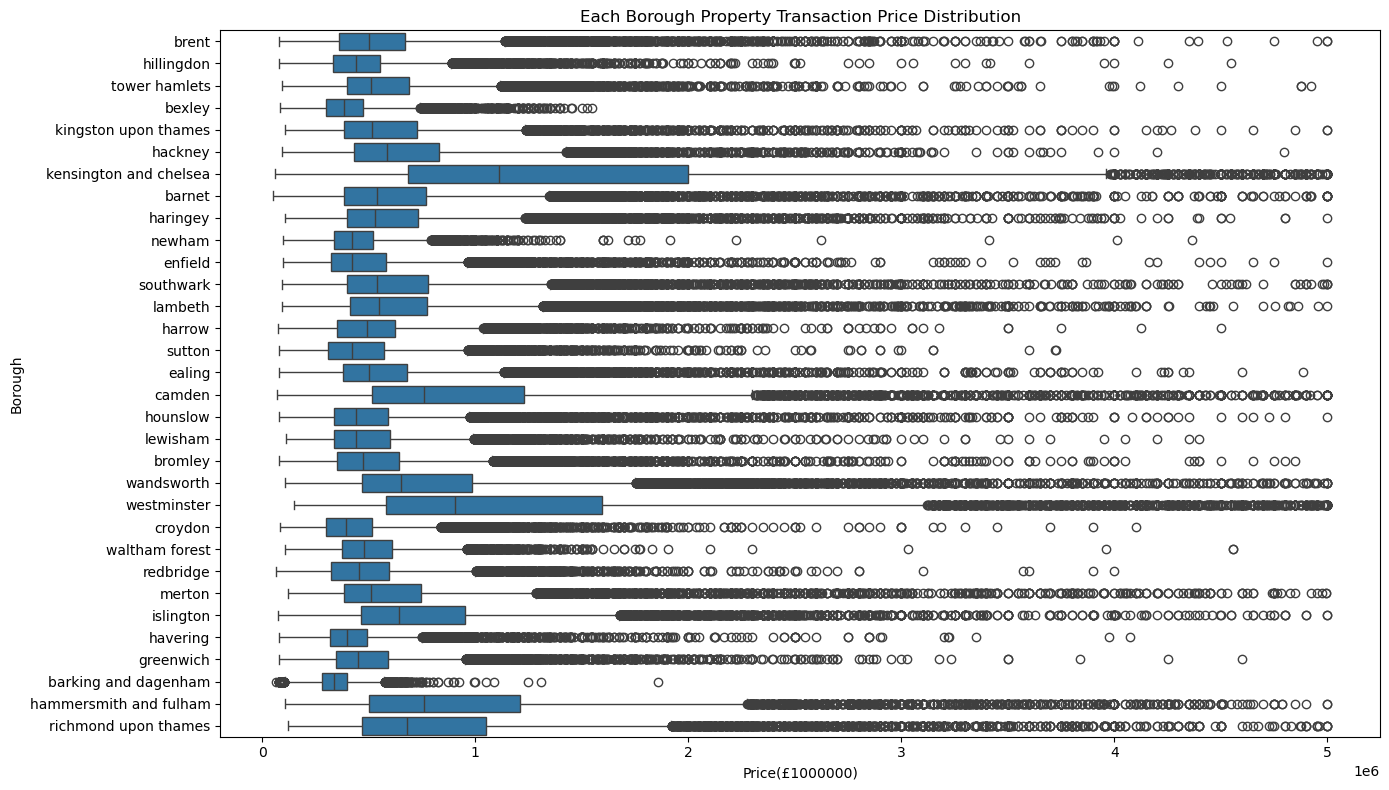

In [55]:
# Calculate standard deviation, mean, median, and skewness of transaction prices for each borough
property_values = london_property.groupby('Borough')['Price'].agg(['std','mean','median'])
property_values['skewness'] =  (property_values['mean'] - property_values['median']).round(2)
property_values
# Plot a boxplot of transaction prices by Borough
plt.figure(figsize=(14, 8))
sns.boxplot(data=london_property, x='Price', y='Borough')
plt.title('Each Borough Property Transaction Price Distribution')
plt.xlabel('Price(£1000000)')
plt.ylabel('Borough')
plt.tight_layout()
plt.savefig('C:/Users/kerry/Desktop/side_project_crime_propertyprice/london_property_and_crime_data/charts/data distribution/price_boxplot_before.png', dpi=300)
plt.show()

In [56]:
# Remove outliers from the 'Price' column using the IQR
def remove_outliers(group):
    q1 = group['Price'].quantile(0.25)
    q3 = group['Price'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return group[(group['Price'] >= lower) & (group['Price'] <= upper)]

london_property = london_property.groupby('Borough', group_keys=False).apply(remove_outliers)

C:\Users\kerry\AppData\Local\Temp\ipykernel_26916\1450558432.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  london_property = london_property.groupby('Borough', group_keys=False).apply(remove_outliers)


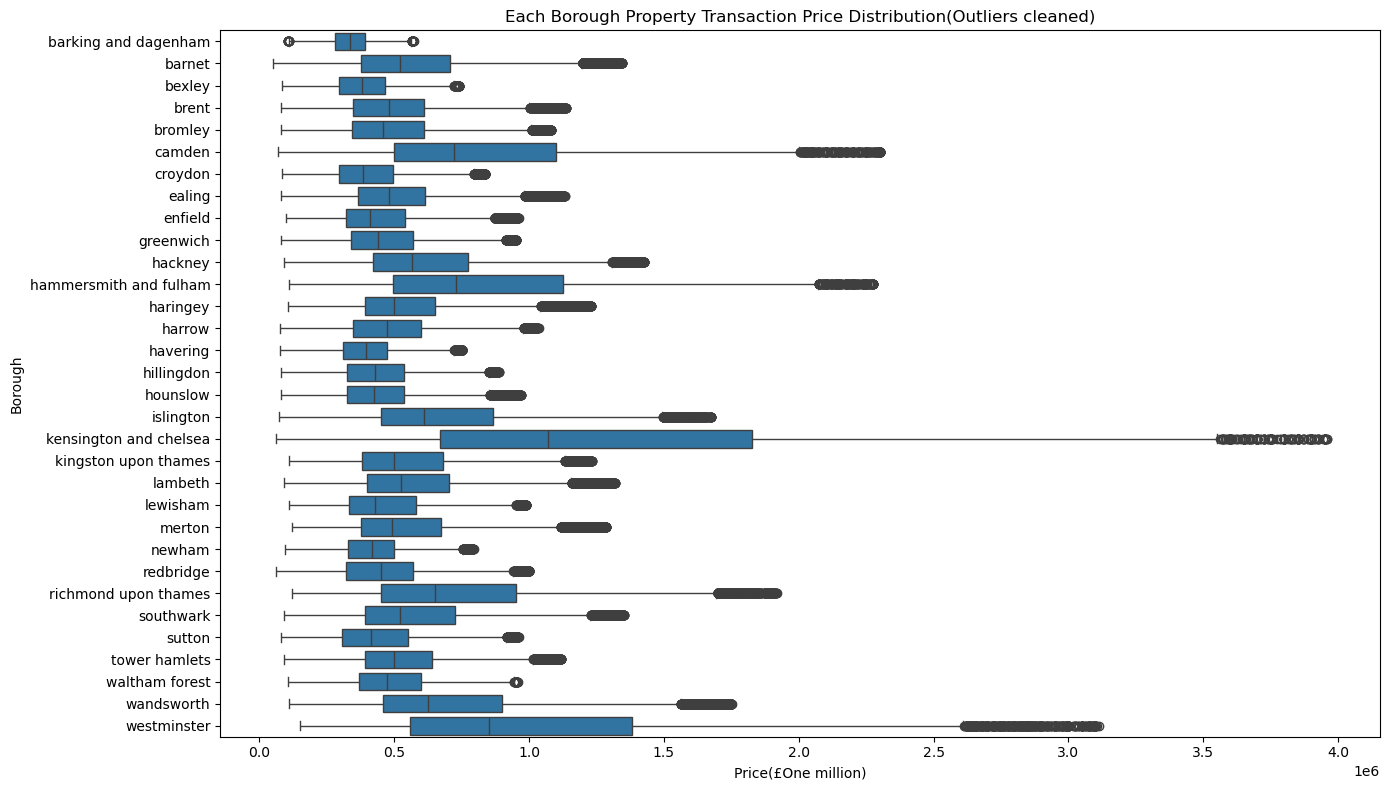

In [57]:
# Calculate standard deviation, mean, median, and skewness of transaction prices for each borough after clean outliers
property_values_cleaned = london_property.groupby('Borough')['Price'].agg(['std','mean','median'])
property_values_cleaned['skewness'] =  (property_values_cleaned['mean'] - property_values_cleaned['median']).round(2)
property_values_cleaned
# Plot a boxplot of transaction prices by Borough
plt.figure(figsize=(14, 8))
sns.boxplot(data=london_property, x='Price', y='Borough')
plt.title('Each Borough Property Transaction Price Distribution(Outliers cleaned)')
plt.xlabel('Price(£One million)')
plt.ylabel('Borough')
plt.tight_layout()
plt.savefig('C:/Users/kerry/Desktop/side_project_crime_propertyprice/london_property_and_crime_data/charts/data distribution/price_boxplot_cleaned.png', dpi=300)
plt.show()

In [58]:
# Convert 'Price' to thousands and rename the column accordingly
london_property['Price'] = london_property['Price']/1000
london_property.rename(columns = {'Price':'Price(k)'}, inplace = True)

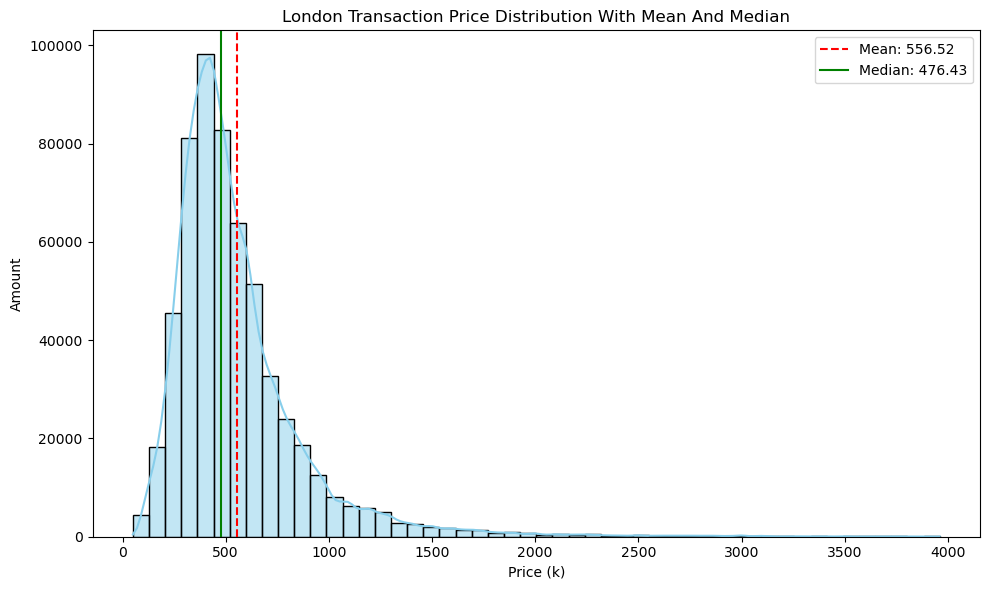

In [59]:
# Plot the distribution of property prices
plt.figure(figsize=(10, 6))
sns.histplot(london_property['Price(k)'], bins = 50, kde = True, color = 'skyblue')
# Plot the mean line
plt.axvline(london_property['Price(k)'].mean(), color='red', linestyle = '--', label = f'Mean: {london_property['Price(k)'].mean():.2f}')
# Plot the median line
plt.axvline(london_property['Price(k)'].median(), color='green',linestyle = '-', label = f'Median: {london_property['Price(k)'].median():.2f}')
# Format plot labels and titles
plt.title('London Transaction Price Distribution With Mean And Median')
plt.xlabel('Price (k)')
plt.ylabel('Amount')
plt.legend()
plt.savefig('C:/Users/kerry/Desktop/side_project_crime_propertyprice/london_property_and_crime_data/charts/data distribution/total_price_hist.png', dpi=300)
plt.tight_layout()
plt.show()

In [60]:
# Compute log-transformed price to reduce skewness, and round to 2 decimal places
london_property['log_price'] = np.log1p(london_property['Price(k)'])
london_property['log_price'] = london_property['log_price'].round(2)

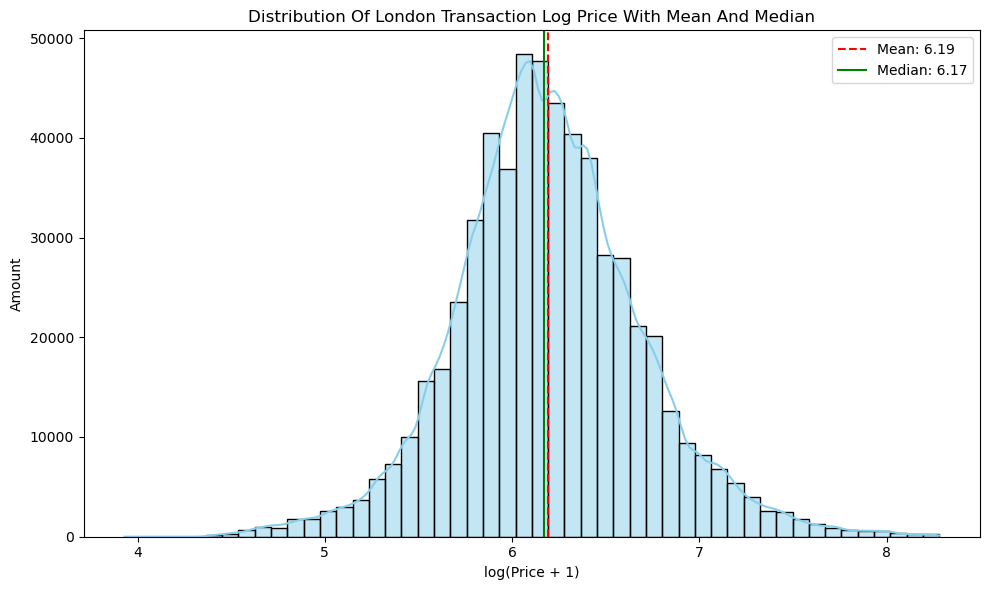

In [61]:
# Plot log-transformed property price distribution
plt.figure(figsize=(10, 6))
sns.histplot(london_property['log_price'], bins=50, kde=True, color='skyblue')
# Plot the mean line
plt.axvline(london_property['log_price'].mean(), color='red', linestyle='--', label=f'Mean: {london_property['log_price'].mean():.2f}')
# Plot the median line
plt.axvline(london_property['log_price'].median(), color='green', linestyle='-', label=f'Median: {london_property['log_price'].median():.2f}')
# Format plot labels and titles
plt.title('Distribution Of London Transaction Log Price With Mean And Median')
plt.xlabel('log(Price + 1)')
plt.ylabel('Amount')
plt.legend()
plt.savefig('C:/Users/kerry/Desktop/side_project_crime_propertyprice/london_property_and_crime_data/charts/data distribution/total_price_log_hist.png', dpi=300)
plt.tight_layout()
plt.show()

In [62]:
# Drop unnecessary columns
london_property = london_property.drop(['Date of Transfer','Postcode','Town/City','County','Outward Code','source_flag','log_price'],axis=1)

In [63]:
# Question 1:
# Have post-pandemic shifts in residential behaviour reshaped housing market trends across London boroughs—and have crime rates also been affected?

In [64]:
# idea
# The first focus of this analysis is the average annual housing price growth across London boroughs from 2020 to 2024.
# In the real estate market, price fluctuations are often key indicators of an area’s development potential and market momentum. 
# A steady increase in property prices typically suggests strong residential appeal, investment attractiveness, or benefits from infrastructure improvements and policy support. 
# Boroughs with higher average annual growth are more likely to hold long-term value. 
# Conversely, areas with low or negative growth may signal declining market confidence, reduced desirability, or external challenges such as safety concerns or structural economic issues.
# PS :　The annual housing price indicator will be represented using the median value.

In [65]:
# Calculate yearly median property prices and total crime count by borough
price_trend_year = london_property.groupby(['Borough', 'Year'])['Price(k)'].median().reset_index()
crime_trend_year = merge_crime_data.groupby(['Borough', 'Year'])['Crime Count'].sum().reset_index()
print(price_trend_year.head())
print(crime_trend_year.head())

                Borough  Year  Price(k)
0  barking and dagenham  2019    310.00
1  barking and dagenham  2020    320.00
2  barking and dagenham  2021    333.50
3  barking and dagenham  2022    365.00
4  barking and dagenham  2023    370.00
                Borough  Year  Crime Count
0  barking and dagenham  2018        17977
1  barking and dagenham  2019        19415
2  barking and dagenham  2020        18167
3  barking and dagenham  2021        18656
4  barking and dagenham  2022        19758


In [66]:
# Merge two table
merged_trend_year = price_trend_year.merge(crime_trend_year, on=['Borough', 'Year'], how='right')

# Compute annual growth of price and crime per borough
merged_trend_year['price_growth'] = merged_trend_year.groupby('Borough')['Price(k)'].pct_change().round(3)
merged_trend_year['crime_growth'] = merged_trend_year.groupby('Borough')['Crime Count'].pct_change().round(3)
merged_trend_year['lag_crime_growth'] = merged_trend_year.groupby('Borough')['crime_growth'].shift(1)
# Caculate avg property growth rate by each borough
avg_property_growth = merged_trend_year.groupby('Borough')['price_growth'].mean().reset_index(name = 'avg_growth').sort_values('avg_growth', ascending = False)
# Caculate avg crime growth rate by each borough
avg_crime_growth = merged_trend_year.groupby('Borough')['lag_crime_growth'].mean().reset_index(name = 'avg_growth').sort_values('avg_growth', ascending = False)

C:\Users\kerry\AppData\Local\Temp\ipykernel_26916\3422787076.py:5: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  merged_trend_year['price_growth'] = merged_trend_year.groupby('Borough')['Price(k)'].pct_change().round(3)


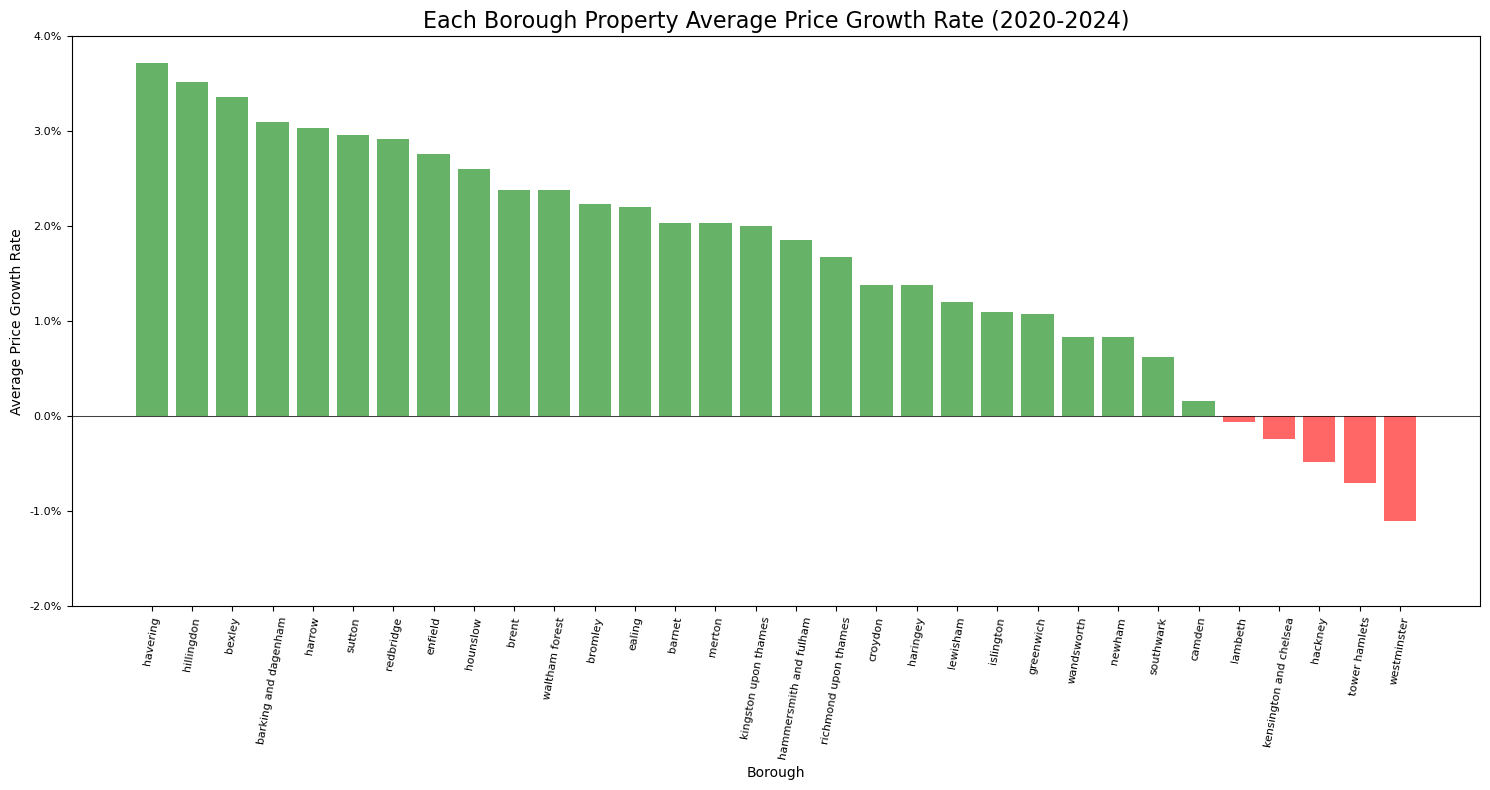

In [67]:
# Assign color based on growth: green if positive or zero, red if negative
avg_property_growth['color'] = avg_property_growth['avg_growth'].apply(lambda x : 'green' if x >=0 else 'red')
# Create a new figure with specified size
plt.figure(figsize = (15,8))
# Draw bar chart: Borough on x-axis, average growth on y-axis, color based on value
plt.bar(avg_property_growth['Borough'],avg_property_growth['avg_growth'], color = avg_property_growth['color'], alpha = 0.6)
# Set chart title and axis labels
plt.title('Each Borough Property Average Price Growth Rate (2020-2024)',fontsize = 16)
plt.xlabel('Borough')
plt.ylabel('Average Price Growth Rate')
plt.xticks(fontsize = 8, rotation=80)
yticks = plt.yticks()[0]
ytick_labels = [f'{y * 100:.1f}%' for y in yticks]
plt.yticks(yticks, labels=ytick_labels, fontsize = 8)
# Draw a horizontal line at y=0 for reference
plt.axhline(y=0, linestyle = '-', linewidth = 0.75,color = 'black', alpha = 0.75)
plt.tight_layout()
plt.savefig('C:/Users/kerry/Desktop/side_project_crime_propertyprice/london_property_and_crime_data/charts/question01/property_avg_growth_bar.png',dpi=300)
plt.show()

In [68]:
# Insight
# The chart reveals that outer London boroughs generally experienced higher average annual housing price growth compared to central areas between 2020 and 2024. 
# Boroughs such as Havering, Hillingdon, and Bexley recorded growth rates exceeding 3%, indicating strong market momentum. 
# These areas, often characterized by traditional residential neighborhoods with relatively affordable housing and accessible commuting options, may have benefited from trends such as family relocation, the rise of remote work, and increased demand from first-time buyers.
# In contrast, central boroughs like Westminster, Camden, Hackney, Tower Hamlets, and Lambeth showed minimal or even negative annual growth. 
# This could be attributed to post-pandemic migration patterns, shifts in the rental market, or price corrections following years of high valuations.
# Overall, the data suggests a structural shift in London’s housing market, with growth expanding outward from the city center. 
# This reflects a reorganization of residential demand and highlights the potential for long-term value appreciation in certain outer boroughs.

In [69]:
# Idea
# In the context of residential and housing market development, public safety is one of the key factors influencing homebuyer preferences and regional property values. 
# An increase in crime rates often dampens buyer interest, slows down price growth, and may even lead to population outflow. 
# In contrast, areas with low or declining crime growth rates typically reflect improving or stable safety conditions, which help sustain housing demand and price momentum.
# Therefore, I aim to examine the average crime growth rate across boroughs as a reference for further analysis.

# PS: Since housing prices typically respond with a delay, I will compare the property price growth of a given year with the crime rate from the previous year in the following analysis.

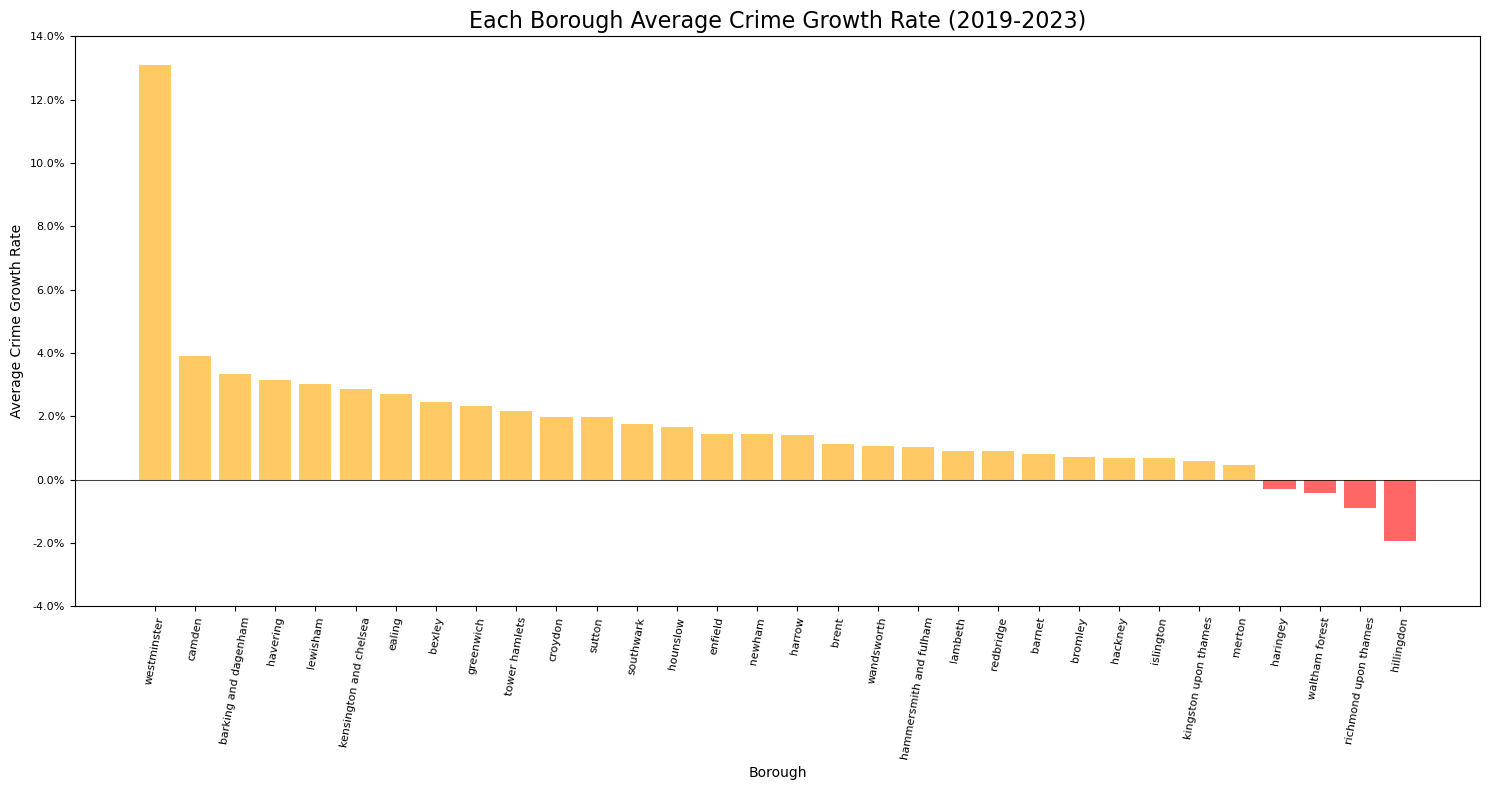

In [70]:
# Assign color based on growth: green if positive or zero, red if negative
avg_crime_growth['color'] = avg_crime_growth['avg_growth'].apply(lambda x : 'orange' if x >=0 else ('orange'if x==-0 else'red'))
# Create a new figure with specified size
plt.figure(figsize = (15,8))
# Draw bar chart: Borough on x-axis, average growth on y-axis, color based on value
plt.bar(avg_crime_growth['Borough'],avg_crime_growth['avg_growth'], color = avg_crime_growth['color'], alpha = 0.6)
# Set chart title and axis labels
plt.title('Each Borough Average Crime Growth Rate (2019-2023)', fontsize = 16)
plt.xlabel('Borough')
plt.ylabel('Average Crime Growth Rate')
plt.xticks(fontsize = 8, rotation=80)
yticks = plt.yticks()[0]
ytick_labels = [f'{y * 100:.1f}%' for y in yticks]
plt.yticks(yticks, labels=ytick_labels, fontsize = 8)
# Draw a horizontal line at y=0 for reference
plt.axhline(y=0, linestyle = '-', linewidth = 0.75,color = 'black', alpha = 0.75)
plt.tight_layout()
plt.savefig('C:/Users/kerry/Desktop/side_project_crime_propertyprice/london_property_and_crime_data/charts/question01/crime_avg_growth_bar.png',dpi=300)
plt.show()

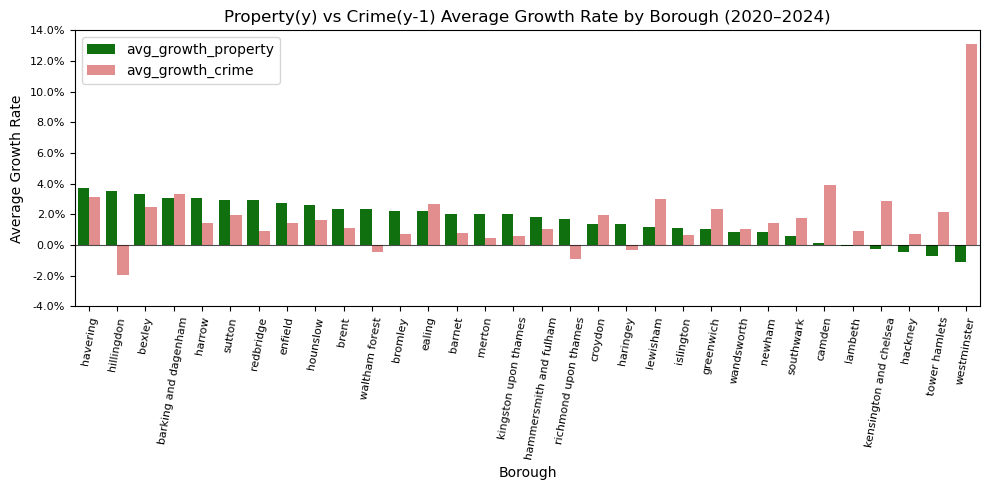

In [71]:
# Merge the average property and crime growth data by Borough
merged_avg = avg_property_growth.merge(
    avg_crime_growth,
    on='Borough',
    how='inner',
    suffixes=['_property', '_crime']
)

# Reshape the DataFrame to long format for easier plotting with seaborn
avg_plot = pd.melt(
    merged_avg,
    id_vars='Borough',
    value_vars=['avg_growth_property', 'avg_growth_crime'],
    var_name='Type',
    value_name='Growth'
)

# Rename columns to more readable format for final output
avg_plot = avg_plot.rename(columns={
    'avg_growth_property': 'property avg growth',
    'avg_growth_crime': 'crime avg growth'
})

# Create a figure for the bar plot
plt.figure(figsize=(10, 5))

# Plot grouped bar chart of property and crime growth rates by Borough
sns.barplot(
    avg_plot,
    x='Borough',
    y='Growth',
    hue='Type',
    palette=['green', 'lightcoral']
)

# Add a horizontal line at y=0 for visual reference
plt.axhline(y=0, color='black', linewidth=0.8, alpha=0.7)

# Label axes and set plot title
plt.xticks(rotation=80, fontsize=8)
yticks = plt.yticks()[0]
ytick_labels = [f'{y * 100:.1f}%' for y in yticks]
plt.yticks(yticks, labels=ytick_labels, fontsize = 8)
plt.xlabel('Borough')
plt.ylabel('Average Growth Rate')
plt.title('Property(y) vs Crime(y-1) Average Growth Rate by Borough (2020–2024)')
plt.legend()
plt.tight_layout()
plt.savefig('C:/Users/kerry/Desktop/side_project_crime_propertyprice/london_property_and_crime_data/charts/question01/property_vs_crime_avg_growth_bar_sns.png', dpi=300)
plt.show()


In [72]:
# Insight
# The chart shows that most London boroughs experienced a positive average annual crime growth rate between 2019 and 2023, indicating an overall upward trend in criminal incidents during the post-pandemic and recovery periods. 
# Notably, areas like Westminster and Camden reported significantly higher crime growth rates. 
# As central locations and high-footfall commercial hubs, these boroughs may have been affected by the resurgence of tourism, increased crowd density, and the revival of nightlife and the evening economy.
# Interestingly, outer boroughs such as Havering, Barking & Dagenham, and Bexley showed simultaneous increases in both crime rates and property prices. 
# These areas may be undergoing urban redevelopment or gentrification, attracting middle- to high-income residents and driving up housing prices. 
# However, in the early stages of such transitions, growing income inequality and social tensions may contribute to increases in certain types of crime.
# In contrast, residential boroughs like Richmond upon Thames, Hillingdon, Waltham Forest, and Haringey—located in the mid-to-outer zones of London—exhibited low or even negative crime growth rates. 
# This suggests more stable public safety and a relatively peaceful living environment, making these areas particularly promising for further analysis of housing price trends.

In [73]:
# Filter the dataset to include only data from 2020 onwards
corr_cal = merged_trend_year[merged_trend_year['Year']>=2020]
# Group by Borough and calculate the Pearson correlation between price_growth and crime_growth
corr_cal = corr_cal.groupby('Borough').apply(lambda x : x['price_growth'].corr(x['lag_crime_growth'])).reset_index(name='corr')

# Sort boroughs by correlation value in descending order
corr_cal = corr_cal.sort_values('corr', ascending = False)
corr_cal['corr'] = corr_cal['corr'].round(2)

C:\Users\kerry\AppData\Local\Temp\ipykernel_26916\2930448529.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_cal = corr_cal.groupby('Borough').apply(lambda x : x['price_growth'].corr(x['lag_crime_growth'])).reset_index(name='corr')


In [74]:
print(merged_trend_year[['Borough','Year','price_growth','crime_growth','lag_crime_growth']].head(7))
print(corr_cal)

                Borough  Year  price_growth  crime_growth  lag_crime_growth
0  barking and dagenham  2018           NaN           NaN               NaN
1  barking and dagenham  2019           NaN          0.08               NaN
2  barking and dagenham  2020          0.03         -0.06              0.08
3  barking and dagenham  2021          0.04          0.03             -0.06
4  barking and dagenham  2022          0.09          0.06              0.03
5  barking and dagenham  2023          0.01          0.07              0.06
6  barking and dagenham  2024         -0.03         -0.04              0.07
                   Borough  corr
10                 hackney  0.80
30              wandsworth  0.43
9                greenwich  0.40
17               islington  0.32
7                   ealing  0.29
19    kingston upon thames  0.21
21                lewisham  0.21
11  hammersmith and fulham  0.20
4                  bromley  0.19
6                  croydon  0.14
20                 lambeth  0

In [75]:
# Question 2:
# What is the correlation between crime rate trends and property price changes across different boroughs?

In [76]:
#Idea
# This stage aims to explore whether changes in public safety across London boroughs directly influence property prices. 
# Safety is a key factor for both homebuyers and investors when assessing an area’s value, and it may also be used by lenders as a risk or mortgage approval indicator. 
# Therefore, I plan to create a correlation chart as a foundation for further research.
# Given the time-lagged nature of housing price responses, this chart uses the Pearson correlation coefficient between the previous year’s crime growth rate and the current year’s property price growth rate to assess potential linear relationships.
# A positive correlation in a borough suggests that price movements follow crime trends from the previous year—possibly indicating that rising prices coincide with increased urban activity. 
# A negative correlation indicates greater sensitivity to safety conditions, where rising crime may lead to declining property values. 
# If the correlation is near zero, it implies no clear relationship between crime changes and housing prices, suggesting other factors may be at play.

C:\Users\kerry\AppData\Local\Temp\ipykernel_26916\1466248201.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(corr_cal, x='corr', y='Borough', palette=corr_cal['color'].tolist())
C:\Users\kerry\AppData\Local\Temp\ipykernel_26916\1466248201.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize='small', loc='upper left')


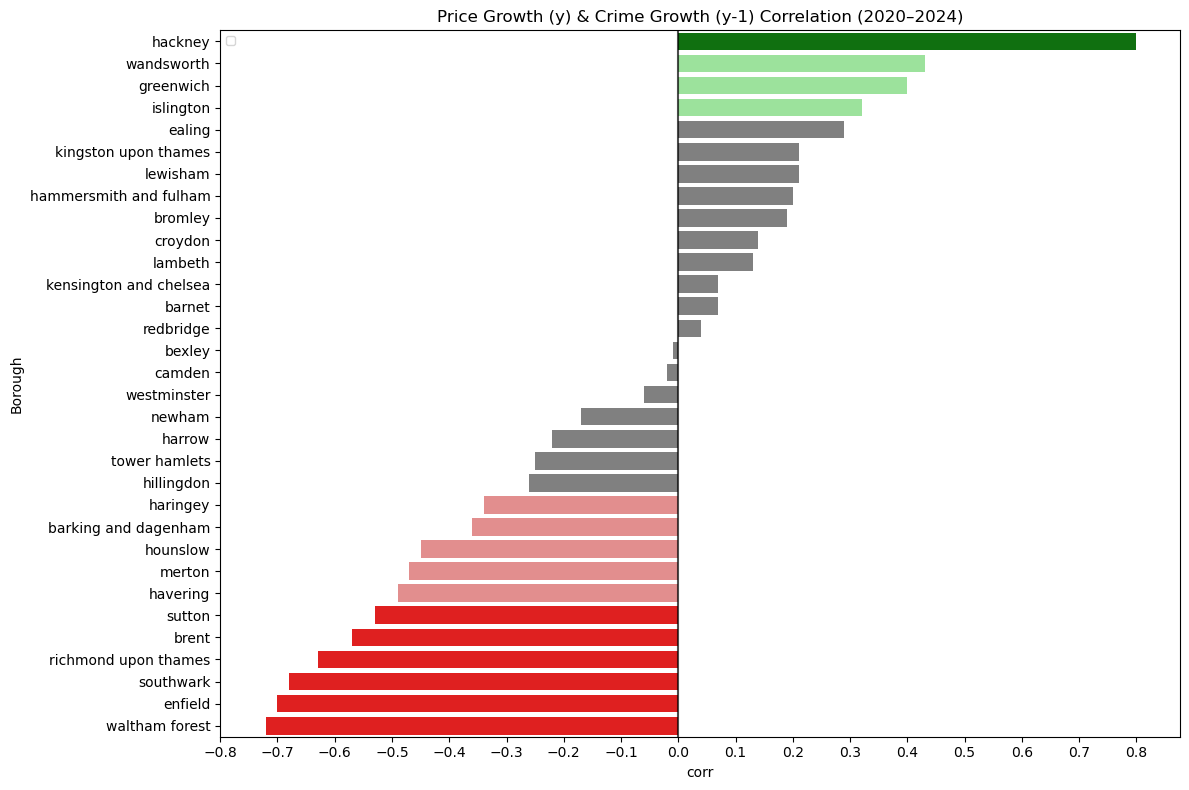

In [77]:
# Set up the figure size
plt.figure(figsize=(12, 8))

# Assign bar colors based on correlation strength
corr_cal['color'] = corr_cal['corr'].apply(lambda x: 'green' if x >= 0.5 else ('lightgreen' if (x <0.5) & (x>=0.3) else ('red' if x<=-0.5 else('lightcoral' if (x>-0.5) & (x<=-0.3) else 'grey'))))

# Plot horizontal bar chart of correlation values by borough
sns.barplot(corr_cal, x='corr', y='Borough', palette=corr_cal['color'].tolist())

# Add reference lines for zero correlation and thresholds
plt.axvline(x=0, linestyle='-', color='black', alpha=0.7)

# Set the chart title and legend
plt.xticks(np.arange(-0.8, 0.81, 0.1))
plt.title('Price Growth (y) & Crime Growth (y-1) Correlation (2020–2024)')
plt.legend(fontsize='small', loc='upper left')
plt.tight_layout()
plt.savefig('C:/Users/kerry/Desktop/side_project_crime_propertyprice/london_property_and_crime_data/charts/question02/price&crime_growth_corr.png', dpi=300)
plt.show()

In [78]:
# Insight
# In this correlation chart, we observed that several boroughs exhibit a clear negative correlation between annual property price growth and the previous year’s crime growth rate.
# The most notable examples include Waltham Forest, Enfield, Richmond upon Thames, Sutton, and Brent. 
# These areas may have undergone community redevelopment or public safety improvement initiatives during the period, which likely enhanced their residential appeal and contributed to rising property values—making them worth close attention.
# In addition, Haringey, Hounslow, Merton, and Havering also show a moderate negative correlation, suggesting this trend is not isolated but rather somewhat widespread across London. 
# For homebuyers and investors, such areas—where crime rates are stable or decreasing—may offer greater long-term value and a stronger sense of safety.
# On the other hand, Southwark and Barking & Dagenham show higher average crime growth than housing price growth, prompting further investigation into whether any outliers or extreme fluctuations are influencing the data.
# Lastly, although Hillingdon does not exhibit a strong correlation, the noticeable gap between its crime and property growth rates makes it a relevant case for continued analysis.

In [79]:
# Question 3:
# Among boroughs with low crime rates, are there certain areas where property transaction volume and median prices are relatively high?

In [80]:
# Idea
# This question aims to identify whether there are low-crime boroughs in London that demonstrate both high property transaction volume and stable median prices. 
# By comparing transaction counts and median prices across boroughs, the analysis seeks to pinpoint areas that combine public safety with strong market activity, offering long-term residential and investment potential. 
# These insights will help developers, homebuyers, and investors focus on truly promising and high-performing locations.

In [81]:
# Filter crime records from January 2020 onwards
crime_count = merge_crime_data[(merge_crime_data['Year'] >= 2019) & (merge_crime_data['Year'] <= 2023)]

# Aggregate total crime counts by Borough and MajorText category
crime_count = crime_count.groupby('Borough')['Crime Count'].sum().reset_index()

# Sort the results by Borough and total crime count
crime_count = crime_count.sort_values('Crime Count', ascending=False)

# Calculate the median of crime volume
median_crime_count = crime_count['Crime Count'].median()

# Filter out Boroughs with crime volume less than or equal to the median, representing low-crime areas
low_crime = crime_count[crime_count['Crime Count']<=median_crime_count]

# Add a new column 'state' to label each Borough as either a high-crime or low-crime area
crime_count['state'] = crime_count['Borough'].apply(lambda x : 'Low Crime Borough' if x in low_crime['Borough'].values else 'High Crime Borough')

C:\Users\kerry\AppData\Local\Temp\ipykernel_26916\2692661045.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=crime_count,x='Borough',y='Crime Count',hue = 'state', palette = custom_palette,ci=None)


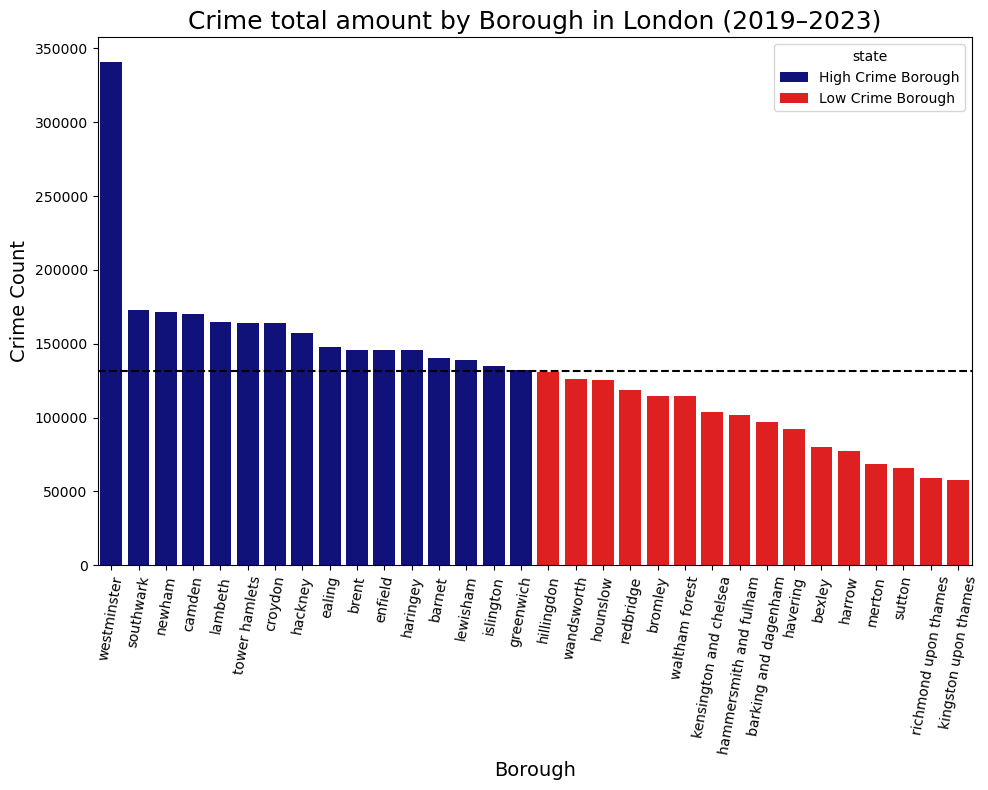

In [82]:
# Set up the figure size
plt.figure(figsize=(10,8))
# Use a custom color palette to distinguish low-crime (red) and high-crime (dark blue) areas
custom_palette = {'Low Crime Borough': 'red','High Crime Borough': 'darkblue'}
# Create a bar plot showing total crime count by Borough
sns.barplot(data=crime_count,x='Borough',y='Crime Count',hue = 'state', palette = custom_palette,ci=None)

# Format plot labels and titles
plt.title('Crime total amount by Borough in London (2019–2023)', fontsize=18)
plt.ylabel('Crime Count', fontsize=14)
plt.xlabel('Borough', fontsize=14)
plt.xticks(rotation=80)
# Draw a dashed line at the median crime count to indicate the average crime level
plt.axhline(y=median_crime_count, linestyle='--', color='black', label = 'Average Crime Count')
plt.tight_layout()
plt.savefig('C:/Users/kerry/Desktop/side_project_crime_propertyprice/london_property_and_crime_data/charts/question03/crime_amount_bar.png',dpi = 300)
plt.show()

In [83]:
# Insight
# From 2019 to 2023, it is evident that several outer boroughs—such as Richmond upon Thames, Sutton, and Kingston upon Thames—maintain relatively low crime levels, reflecting a generally stable public safety environment. 
# In contrast, Westminster stands out with an exceptionally high crime total, which is expected given its role as a major tourist and central district. 
# Overall, the differences in crime totals among the remaining boroughs are not drastic. 
# By using the median as a threshold, 16 boroughs fall below the citywide median crime count. 
# This classification offers a valuable foundation for further analysis of housing market activity and price trends in safer areas, helping to identify boroughs with strong investment potential.

In [84]:
# Filter the property dataset to only include records from the year 2020 onwards
price_count = london_property[london_property['Year']>=2020]
# Group the data by Borough and count the number of unique transactions per borough
price_count = price_count.groupby('Borough')['Transaction unique identifier'].count().reset_index(name = 'Transaction Count')
# Calculate the median transaction count across all boroughs
median_trans_line = price_count['Transaction Count'].median()
# Sort the boroughs by transaction count in descending order
price_count = price_count.sort_values('Transaction Count',ascending = False)
# Add a new column 'state' to categorize boroughs based on crime and transaction volume
# Conditions:
# - If a borough is in the low_crime list AND has a transaction count >= the median → label as 'Low Crime & High Transaction Count Borough'
# - If it's only in the low_crime list → label as 'Low Crime Count Borough'
# - Otherwise → label as 'Others'
price_count['state'] = price_count.apply(lambda x: 'Low Crime & High Transaction Count Borough' \
                                         if ((x['Borough'] in low_crime['Borough'].values) and (x['Transaction Count'] >= median_trans_line)) \
                                         else ('Low Crime Count Borough'if x['Borough'] in low_crime['Borough'].values \
                                        else 'Others'),axis=1)

C:\Users\kerry\AppData\Local\Temp\ipykernel_26916\2190007034.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


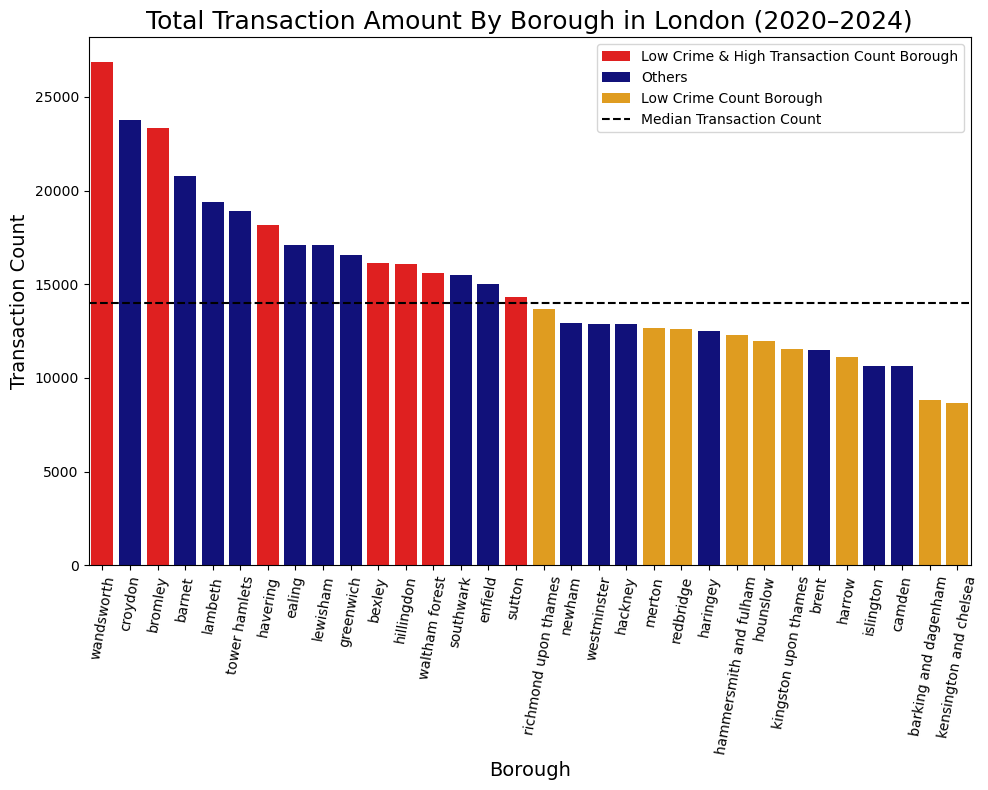

In [85]:
# Set the overall figure size
plt.figure(figsize=(10, 8))

# Define custom colors for each state category
custom_palette = {
    'Low Crime & High Transaction Count Borough': 'red',
    'Low Crime Count Borough': 'orange',
    'Others': 'darkblue'
}

# Create a bar plot of transaction count by borough, colored by state category
sns.barplot(
    data=price_count,
    x='Borough',
    y='Transaction Count',
    hue='state',
    palette=custom_palette,
    ci=None
)

# Add plot title and axis labels with custom font sizes
plt.title('Total Transaction Amount By Borough in London (2020–2024)', fontsize=18)
plt.ylabel('Transaction Count', fontsize=14)
plt.xlabel('Borough', fontsize=14)
plt.xticks(rotation=80)

# Draw a horizontal dashed line at the median transaction count for reference
plt.axhline(
    y=median_trans_line,
    linestyle='--',
    color='black',
    label='Median Transaction Count'
)

plt.legend()
plt.tight_layout()
plt.savefig('C:/Users/kerry/Desktop/side_project_crime_propertyprice/london_property_and_crime_data/charts/question03/transaction_amount_bar.png', dpi=300)
plt.show()


In [86]:
# Insight
# Between 2020 and 2024, several low-crime boroughs—such as Wandsworth, Bromley, and Havering—also recorded above-median property transaction volumes. 
# This indicates that these areas are not only safe but also highly active in the housing market, reflecting strong buyer demand. 
# As previously mentioned, boroughs such as Richmond upon Thames and Kingston upon Thames, while maintaining stable public safety, had relatively lower transaction volumes. 
# This may be attributed to higher property price thresholds or limited housing supply—factors that warrant further investigation. 
# Overall, the overlap of low crime and high market activity highlights boroughs with strong residential appeal and investment potential.

In [87]:
# Filter the data to only include low-crime boroughs from 2020 onwards
low_crime_borough_median_line = price_trend_year[(price_trend_year['Borough'].isin(low_crime['Borough'])) & (price_trend_year['Year']>=2020)]
# Filter the full London dataset for the same year range (2020 onwards)
london_median = price_trend_year[price_trend_year['Year']>=2020]
# Calculate the overall London median house price by year
london_median = london_median.groupby('Year')['Price(k)'].median().reset_index(name = 'Year Median')
# Merge the low-crime borough data with London-wide yearly medians
merged_london_median = low_crime_borough_median_line.merge(london_median, on = ['Year'], how = 'left')

# Compute the average property price per low-crime borough from 2020 onwards
avg_price = merged_london_median.groupby('Borough')['Price(k)'].mean()
# Compute the average London-wide yearly median price
avg_london_median = merged_london_median.groupby('Borough')['Year Median'].mean()

# Calculate the difference
price_diff = avg_price - avg_london_median

# Label boroughs as 'low' if their average price is below the London-wide median, otherwise 'high'
state = price_diff.apply(lambda x: 'low' if x < 0 else 'high').reset_index(name = 'state')

# Merge the 'state' label back into the original merged dataset
merged_london_median = merged_london_median.merge(state, on='Borough')

# Separate the boroughs based on their classification
low_borough = merged_london_median[merged_london_median['state'] == 'low']
high_borough = merged_london_median[merged_london_median['state'] == 'high']

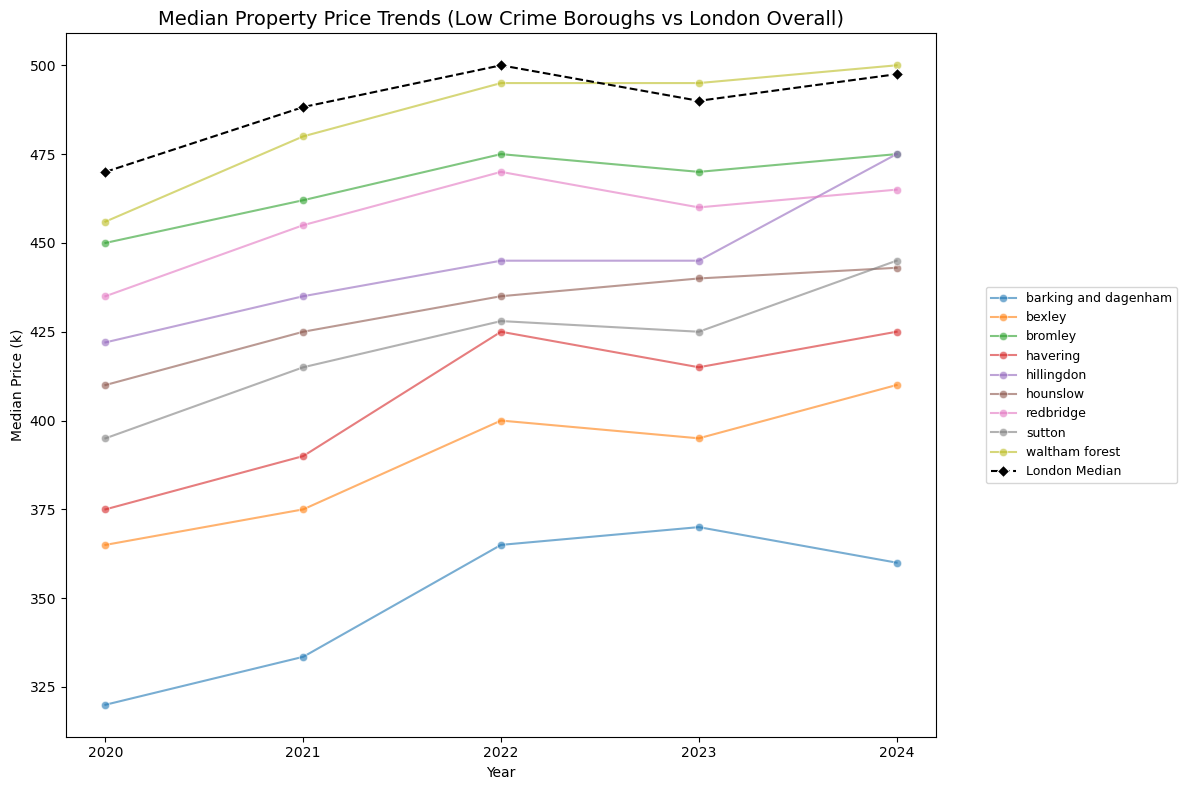

In [88]:
# Set figure size
plt.figure(figsize=(12, 8))

# Plot median property prices for each borough
sns.lineplot(
    data=low_borough,
    x='Year',
    y='Price(k)',
    hue='Borough',
    marker='o',
    linewidth=1.5,
    alpha=0.6
)

# Overlay London-wide median price line
sns.lineplot(
    data=london_median,
    x='Year',
    y='Year Median',
    color='black',
    linestyle='--',
    label='London Median',
    marker='D'
)

# Add title and axis labels
plt.title('Median Property Price Trends (Low Crime Boroughs vs London Overall)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Median Price (k)')
plt.xticks(np.arange(2020, 2025, 1))
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=9)
plt.tight_layout()
plt.savefig('C:/Users/kerry/Desktop/side_project_crime_propertyprice/london_property_and_crime_data/charts/question03/low_crime_borough_yearly_median_line.png', dpi=300)
plt.show()


In [89]:
# Insight
# Among the lower-priced boroughs, areas such as Bexley, Bromley, Havering, Sutton, and Hillingdon have shown steady price growth. 
# Their combination of affordability—compared to the London-wide average—and relatively high transaction volumes highlights their ongoing market resilience and growth potential. 
# Redbridge, while showing less transactional activity overall, still demonstrates a clear upward price trend.
# Waltham Forest stands out as a particularly promising area, with median property prices now approaching or even exceeding the London average—a typical indicator of an emerging high-demand borough.
# Barking and Dagenham, however, presents a more complex picture. Although it experienced notable growth in earlier years, its price trend began to flatten after 2023, coupled with consistently low transaction volume. 
# This may point to underlying structural challenges, such as limited new housing supply, economic constraints, or a mismatch between market pricing and buyer expectations.
# Finally, Hounslow’s price growth has also slowed year by year. Based on earlier correlation findings, a possible rise in crime rates in recent years may have contributed to this trend. Alternatively, the area may have reached a stage of post-development stabilization, positioning itself as an affordable and mature residential zone.

In [90]:
# PS: By observing the overall median property prices in London, we can see that during the pandemic period from 2020 to 2022, housing prices rose rapidly, largely driven by fiscal policies. 
# In 2023, as the global economy tightened (a trend that actually began in mid-2022), property prices began to decline—revealing a clear lag in market response. 
# However, by 2024, signs of recovery have started to emerge.

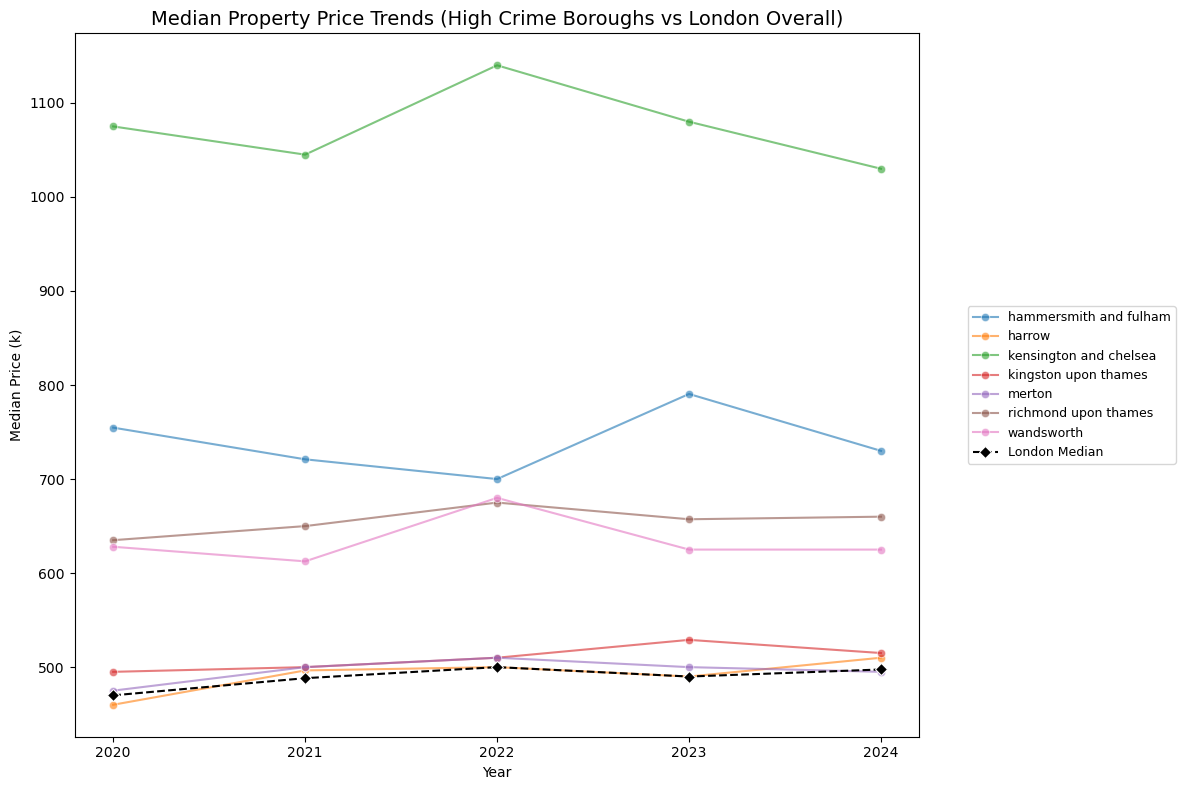

In [91]:
# Set figure size
plt.figure(figsize=(12, 8))

# Plot median property prices for each borough
sns.lineplot(
    data=high_borough,
    x='Year',
    y='Price(k)',
    hue='Borough',
    marker='o',
    linewidth=1.5,
    alpha=0.6,
)

# Overlay London-wide median price line
sns.lineplot(
    data=london_median,
    x='Year',
    y='Year Median',
    color='black',
    linestyle='--',
    label='London Median',
    marker='D',
)

# Add title and axis labels
plt.title('Median Property Price Trends (High Crime Boroughs vs London Overall)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Median Price (k)')
plt.xticks(np.arange(2020, 2025, 1))
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=9)
plt.tight_layout()
plt.savefig('C:/Users/kerry/Desktop/side_project_crime_propertyprice/london_property_and_crime_data/charts/question03/high_crime_borough_yearly_median_line.png', dpi=300)
plt.show()


In [92]:
# Insight
# Among the high-price boroughs, most—aside from Kensington and Chelsea—showed stable trends in median property prices, suggesting long-term potential for value preservation. 
# Wandsworth, in particular, stands out as a borough that combines low crime, high transaction volume, and above-average housing prices, offering both residential appeal and investment advantages—though the entry threshold remains moderately high. Kensington and Chelsea, while maintaining the highest price level by a large margin, recorded the lowest transaction volume among the group. 
# This likely reflects its positioning as a premium investment market with limited property turnover, highlighting the varying market structures and development roles within London’s high-price zones.

In [93]:
# Question 4: 
# Is it possible to identify “high-potential” boroughs—areas where crime rates are stabilizing or improving, and property prices remain relatively affordable?

In [94]:
# Idea
# To address this question, I plan to focus on the 12 boroughs with the strongest negative correlation between crime rates and property prices, based on the previous correlation analysis. 
# For each of these boroughs, I will examine the property price growth alongside the previous year’s crime growth to assess their potential.
# While Westminster stands out with significantly higher crime volume, most other boroughs do not show sharp spikes in crime levels. 
# Therefore, in this analysis, the total number of crimes will be treated as a secondary reference rather than a primary factor.
# The criteria for identifying “high-potential” areas are straightforward:
# Property prices are stable or increasing, and
# Crime rates are stable or decreasing,or
# Crime growth exists, but the overall crime volume remains low.

In [95]:
# Select the 12 boroughs with the strongest negative correlation
pick_borough_list = corr_cal['Borough'].tail(12)

# Filter the correlation table to include only those selected boroughs
high_corr_borough = corr_cal[corr_cal['Borough'].isin(pick_borough_list)]
# Merge selected boroughs with their corresponding yearly property price and crime trends
point_borough = high_corr_borough[['Borough','corr']].merge(merged_trend_year, on = 'Borough', how = 'left')
# Filter to only include data from the year 2020 onward
point_borough = point_borough[point_borough['Year']>=2020]
# Create a combined label for plotting, showing borough name and correlation value
point_borough['b&c'] = point_borough['Borough'] + ' | (' + point_borough['corr'].astype(str) + ')'

In [96]:
# Define a list of the select boroughs
select_property_type_list = ['enfield | (-0.7)', 'havering | (-0.49)', 'hillingdon | (-0.26)', 'merton | (-0.47)', 'richmond upon thames | (-0.63)', \
                             'sutton | (-0.53)', 'waltham forest | (-0.72)']

C:\Users\kerry\AppData\Local\Temp\ipykernel_26916\4287168733.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


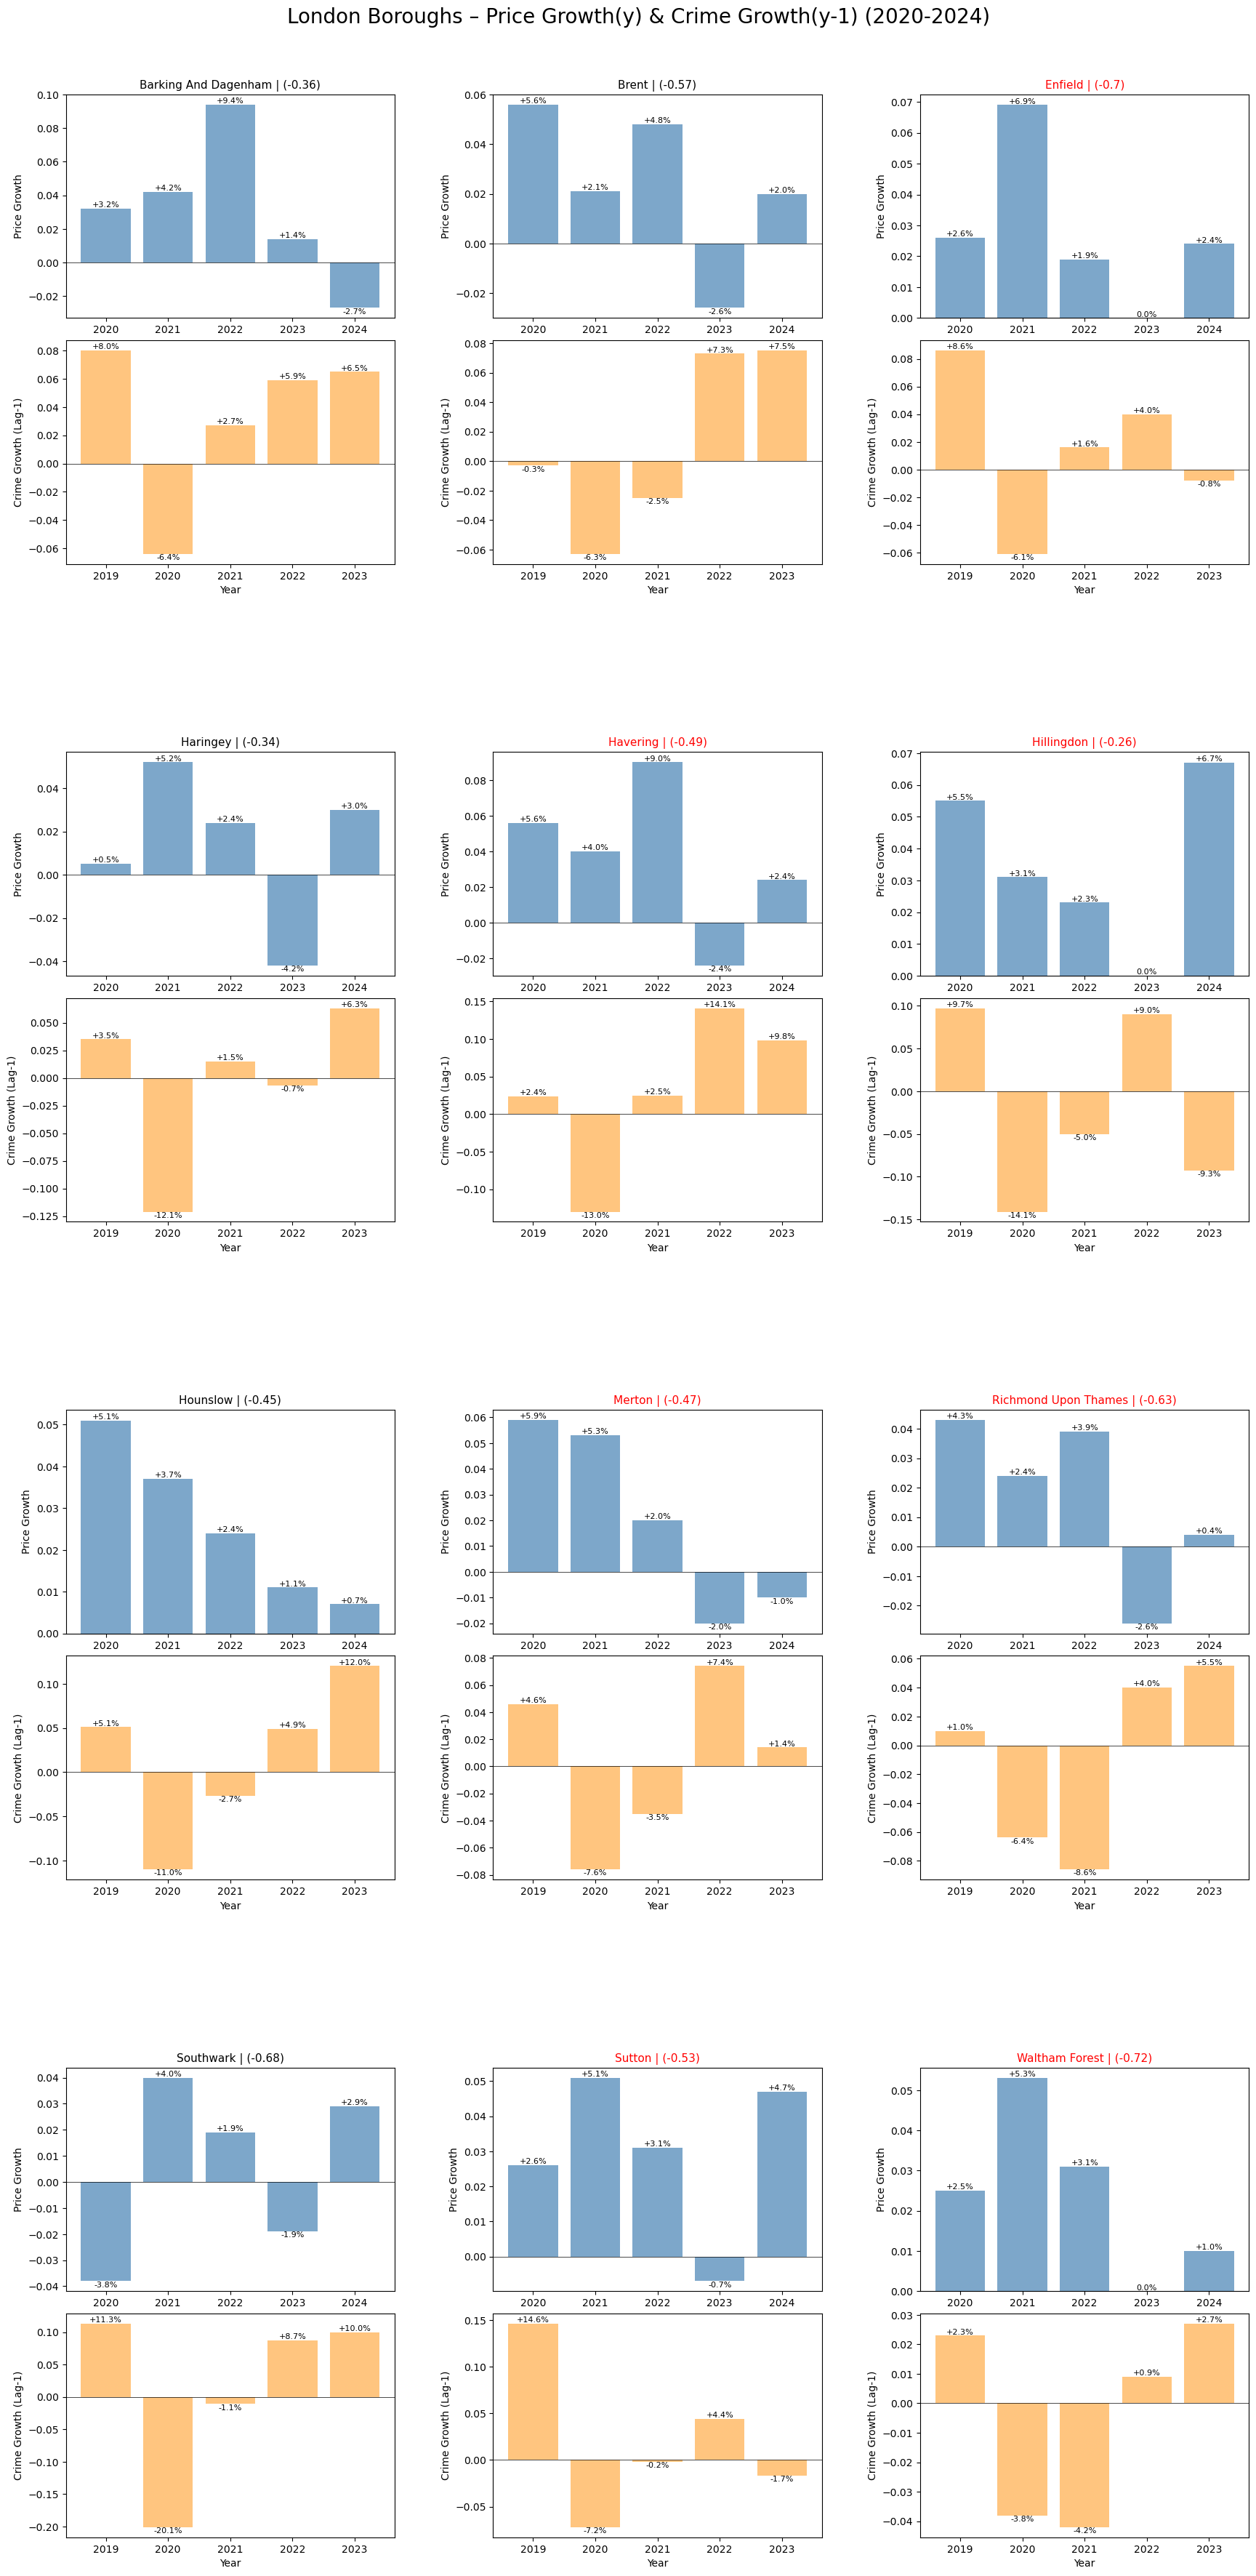

In [97]:
# Used for custom subplot layout
import matplotlib.gridspec as gridspec

# Define grid layout: 3 columns, enough rows to fit all boroughs
cols = 3
boroughs = sorted(point_borough['b&c'].unique())
n_boroughs = len(boroughs)
rows = math.ceil(n_boroughs / cols)

# Create overall figure size based on number of rows and columns
fig = plt.figure(figsize=(cols * 7, rows * 10))
outer_grid = gridspec.GridSpec(rows, cols, wspace=0.3, hspace=0.4)

# Loop through each selected borough
for i, borough in enumerate(boroughs):
    # Extract price and crime growth data for the current borough
    price_data = point_borough[point_borough['b&c'] == borough]
    years = price_data['Year']
    price_growth = price_data['price_growth']
    crime_growth = price_data['lag_crime_growth']

    # Create a 2-row (stacked) grid for each borough: price on top, crime on bottom
    inner_grid = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer_grid[i], height_ratios=[1, 1], hspace=0.1)

    # Top Subplot: Property Price Growth
    ax1 = plt.Subplot(fig, inner_grid[0])
    fig.add_subplot(ax1)
    bars1 = ax1.bar(years, price_growth, color='steelblue', alpha=0.7)
    ax1.set_ylabel('Price Growth')
    # Highlight selected property types in red    
    if borough in select_property_type_list:
        ax1.set_title(borough.title(), fontsize=11, color='red')
    else:
        ax1.set_title(borough.title(), fontsize=11)
    ax1.axhline(0, color='black', linewidth=0.5)
    ax1.set_xticks([2020, 2021, 2022, 2023, 2024])
    
    # Annotate each bar with growth percentage
    for bar in bars1:
        height = bar.get_height()
        sign = '+' if height > 0 else ''
        ax1.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{sign}{height * 100:.1f}%', ha='center', va='bottom' if height >= 0 else 'top', fontsize=8)

    # Bottom Subplot: Lagged Crime Growth (Year-1)
    ax2 = plt.Subplot(fig, inner_grid[1])
    fig.add_subplot(ax2)
    bars2 = ax2.bar(years-1, crime_growth, color='darkorange', alpha=0.5)
    ax2.set_ylabel('Crime Growth (Lag-1)')
    ax2.set_xlabel('Year')
    ax2.axhline(0, color='black', linewidth=0.5)
    
    # Annotate each bar with growth percentage
    for bar in bars2:
        height = bar.get_height()
        sign = '+' if height > 0 else ''
        ax2.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{sign}{height * 100:.1f}%', ha='center', va='bottom' if height >= 0 else 'top', fontsize=8)

fig.suptitle('London Boroughs – Price Growth(y) & Crime Growth(y-1) (2020-2024)', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig('C:/Users/kerry/Desktop/side_project_crime_propertyprice/london_property_and_crime_data/charts/question04/yearly_growth_splitbar.png', dpi=300)
plt.show()


In [98]:
# Insight (2020–2024 Growth Trends)
# Between 2020 and 2024, boroughs such as Enfield, Hillingdon, and Sutton demonstrated a clear upward trend in property prices alongside improving public safety. 
# The consistent decline in crime rates during this period, coupled with rising property values, suggests that these areas are experiencing steady housing market growth under a backdrop of enhanced community safety—making them attractive for both residential living and long-term investment.
# In contrast, most boroughs experienced significant property price growth between 2020 and 2022, likely driven by post-pandemic stimulus policies and increased housing demand. 
# However, from 2023 onwards, growth momentum began to slow or even reverse in many areas. 
# At the same time, lagged crime growth began to resurface in several boroughs. For instance, Barking and Dagenham and Hounslow both exhibited clear signs of declining price momentum combined with rising crime rates, making them less favorable and therefore excluded from the list of high-potential areas.

In [99]:
# Insight (Total Crime Volume Consideration)
# When incorporating overall crime volume into the analysis, boroughs like Richmond upon Thames, Merton, and Havering—despite a slight uptick in crime rates during 2022–2023—still maintained relatively low total crime counts. 
# This mitigates the concern of short-term crime growth and, coupled with relatively stable or slightly declining housing prices during the same period, positions them as promising and balanced areas.
# On the other hand, boroughs such as Southwark, Brent, and Haringey can be ruled out due to their persistently high crime volumes and a noticeable increase in crime growth during 2022–2023.
# Lastly, Waltham Forest stands out as a noteworthy case. 
# While its crime volume and growth are not particularly outstanding, its housing prices demonstrated impressive resilience after 2023, suggesting strong demand and market confidence. 
# This borough could be considered a hidden gem with attractive long-term potential.

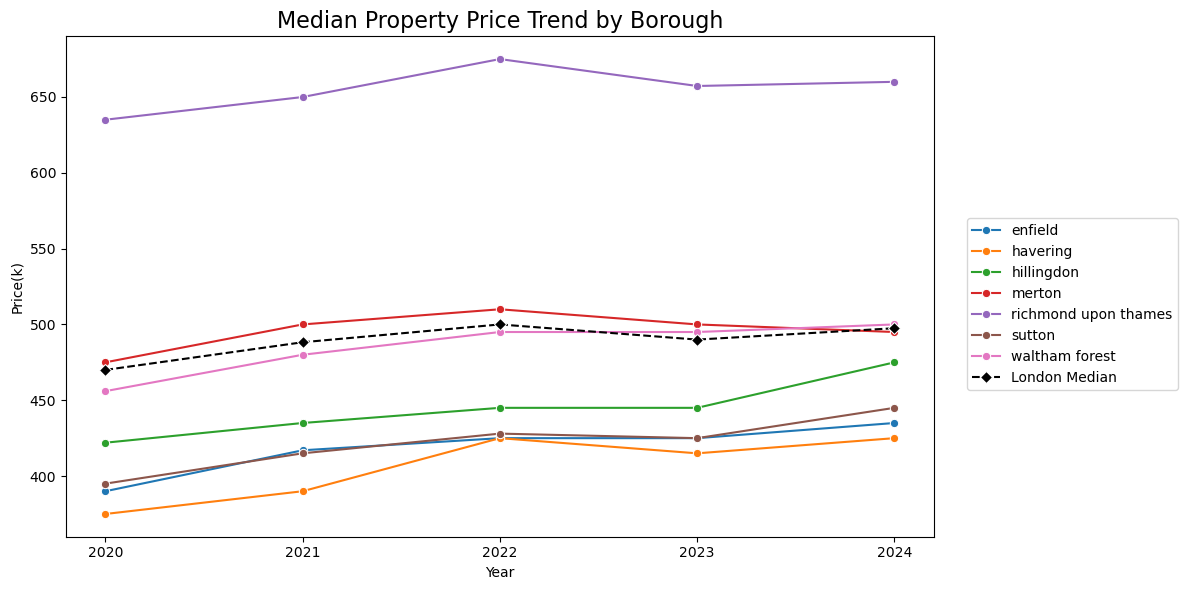

In [100]:
# Define the list of boroughs identified as having promising property and crime trends
up_trend_list = ['enfield','hillingdon','sutton','havering','merton','richmond upon thames','waltham forest']
# Filter the main dataset to include only the selected boroughs and years from 2020 onwards
price_trend_year = price_trend_year[(price_trend_year['Borough'].isin(up_trend_list)) & (price_trend_year['Year']>=2020)]

# Set the figure size for the line plot
plt.figure(figsize=(12, 6))
# Plot the yearly median property price trend for each selected borough
sns.lineplot(
    data=price_trend_year,
    x='Year',
    y='Price(k)',
    hue='Borough',
    marker='o'
)

# Overlay London-wide median price line
sns.lineplot(
    data=london_median,
    x='Year',
    y='Year Median',
    color='black',
    linestyle='--',
    label='London Median',
    marker='D',
)

plt.xticks(np.arange(2020,2025,1))
plt.title('Median Property Price Trend by Borough',fontsize=16)
plt.legend(bbox_to_anchor=(1.03, 0.65))
plt.tight_layout()
plt.savefig('C:/Users/kerry/Desktop/side_project_crime_propertyprice/london_property_and_crime_data/charts/question04/good_trend_borough_line.png',dpi=300)
plt.show()


In [101]:
# Insights
# 1. Affordable with Stable Growth – Ideal for First-Time Buyers
# Enfield, Havering, Sutton, and Hillingdon all had median property prices in the range of £420k–£440k in 2024, making them some of the more affordable options across London.
# Hillingdon stands out in particular, showing a notable price increase between 2023 and 2024, suggesting strong market support. 
# This makes it especially attractive for buyers with a limited budget but who are seeking long-term growth potential.

# 2. Steady and Mature – Stable Areas with High Retention Value
# Waltham Forest experienced rapid price growth from 2020 to 2022, followed by a plateau with slight growth from 2023 to 2024. 
# With a median price around £500k, it represents a mature residential borough in northeast London—ideal for families seeking a balance of livability and long-term value preservation.

# 3. Premium Segment – For Quality Lifestyle or Long-Term Asset Allocation
# Richmond upon Thames is the only borough in this group with a median price exceeding £650k. 
# As part of southwest London’s premium housing belt, it saw a correction in 2023, but prices rebounded in 2024, showing solid market resilience.
# It is well-suited for buyers prioritizing green surroundings and high living standards, particularly those planning to live long-term or allocate capital into real estate as a stable asset.

# 4. Post-Growth Correction – Areas Requiring Caution and Monitoring
# Merton peaked in 2022 and has experienced modest price declines over the following two years. 
# While its 2024 median price remains above £490k, this trend suggests a cooling market. 
# Buyers should observe whether price support and demand can be sustained in the coming years.

In [102]:
# Question 5: 
# Among these boroughs, which type of property (detached, semi-detached, terraced, or flats) shows greater resilience to crime rate fluctuations while maintaining active transaction levels?

In [103]:
# Idea
# To deepen the analysis of the selected high-potential boroughs, I aim to explore the distribution of property types by transaction volume within these areas. 
# This will help identify emerging product demand trends both locally and across the broader London market.
# By pinpointing property types with consistently high transaction activity, we can gain valuable insight into market dynamics and consumer preferences. 
# Such findings can guide industry professionals in aligning their marketing and sales strategies with regional demand patterns—focusing on “trend-aligned property types”—and ultimately improve efficiency and conversion rates.

In [104]:
# Select relevant columns for property type
property_type = london_property[['Borough','Year','Price(k)','Property Type']]

# Calculate median price
property_type = property_type.groupby(['Borough','Year','Property Type'])['Price(k)'].median().reset_index()

# Compute yearly price growth
property_type['price_growth'] = property_type.groupby(['Borough','Property Type'])['Price(k)'].pct_change().round(3)
print(property_type.head(12))

                 Borough  Year Property Type  Price(k)  price_growth
0   barking and dagenham  2019             D    415.00           NaN
1   barking and dagenham  2019             F    235.00           NaN
2   barking and dagenham  2019             S    350.00           NaN
3   barking and dagenham  2019             T    317.50           NaN
4   barking and dagenham  2020             D    420.00          0.01
5   barking and dagenham  2020             F    245.00          0.04
6   barking and dagenham  2020             S    360.00          0.03
7   barking and dagenham  2020             T    325.00          0.02
8   barking and dagenham  2021             D    430.50          0.03
9   barking and dagenham  2021             F    240.00         -0.02
10  barking and dagenham  2021             S    390.00          0.08
11  barking and dagenham  2021             T    345.00          0.06


In [105]:
# Calculate yearly total crime values for each borough
crime_year = merge_crime_data.groupby(['Borough', 'Year'])['Crime Count'].sum().reset_index()

# Calculate yearly crime growth rate and shift it by one year (lag)
crime_year['crime_growth'] = crime_year.groupby('Borough')['Crime Count'].pct_change().round(3)
crime_year['lag_crime_growth'] = crime_year.groupby('Borough')['crime_growth'].shift(1)

# Merge two table
merged_type = property_type.merge(crime_year[['Borough', 'Year', 'lag_crime_growth']], on=['Borough', 'Year'], how='left')
print(merged_type[['Borough','Year','Property Type','price_growth','lag_crime_growth']].head(8))

                Borough  Year Property Type  price_growth  lag_crime_growth
0  barking and dagenham  2019             D           NaN               NaN
1  barking and dagenham  2019             F           NaN               NaN
2  barking and dagenham  2019             S           NaN               NaN
3  barking and dagenham  2019             T           NaN               NaN
4  barking and dagenham  2020             D          0.01              0.08
5  barking and dagenham  2020             F          0.04              0.08
6  barking and dagenham  2020             S          0.03              0.08
7  barking and dagenham  2020             T          0.02              0.08


In [106]:
# Select only the relevant columns for property type and transaction analysis
transaction_pie = london_property[['Transaction unique identifier','Property Type','Borough','Year']]
# Filter data to include only transactions from 2020 onwards
transaction_pie = transaction_pie[transaction_pie['Year']>=2020]
# Group by Property Type and Borough to count the number of transactions
transaction_pie = transaction_pie.groupby(['Property Type','Borough'])['Transaction unique identifier'].count().reset_index(name='Transaction Count')
# Further filter the data to include only the selected "up_trend_list" boroughs
transaction_pie = transaction_pie[transaction_pie['Borough'].isin(up_trend_list)]

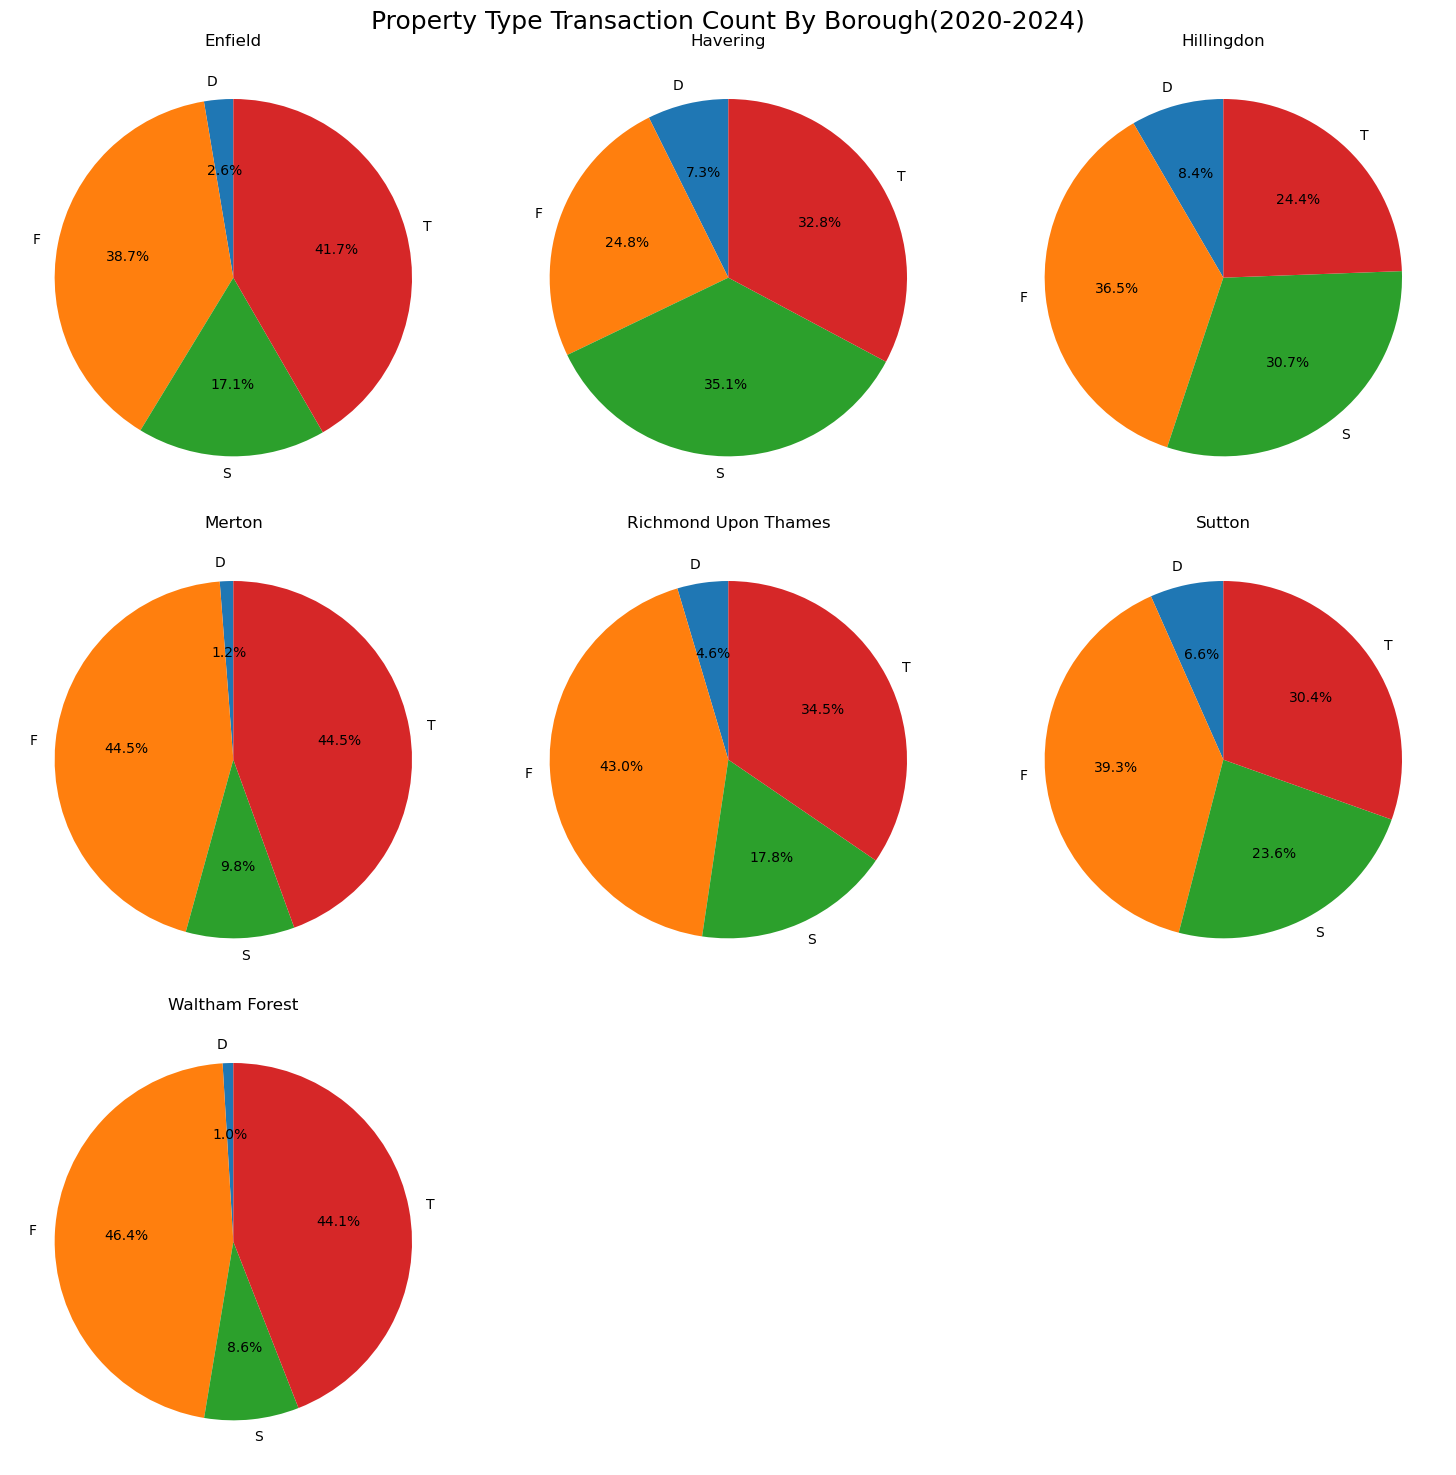

In [123]:
# Retrieve the list of boroughs included in the filtered transaction data
boroughs = transaction_pie['Borough'].unique()
n_boroughs = len(boroughs)

# Define the layout: 3 pie charts per row
cols = 3
rows = int((n_boroughs + cols - 1) / cols)

# Create the subplots grid based on the number of boroughs
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
axes = axes.flatten()

# Generate one pie chart per borough
for i, borough in enumerate(boroughs):
    ax = axes[i]
    data = transaction_pie[transaction_pie['Borough'] == borough]
    
    ax.pie(
        data['Transaction Count'], 
        labels=data['Property Type'], 
        autopct='%1.1f%%', 
        startangle=90
    )
    ax.set_title(borough.title())

# Turn off any unused subplot axes if the number of boroughs is not a multiple of the grid size
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Property Type Transaction Count By Borough(2020-2024)',fontsize=18)
plt.tight_layout()
plt.savefig('C:/Users/kerry/Desktop/side_project_crime_propertyprice/london_property_and_crime_data/charts/question05/pie_distrubute.png',dpi = 300)
plt.show()


In [108]:
# Insight
# Merton, Waltham Forest, and Richmond upon Thames are clearly dominated by flats and terraced houses, which together account for over 85% of property transactions. 
# This concentration suggests that these boroughs are currently focused on small- to mid-sized, affordable housing. 
# Given that property prices in these areas tend to trend remain above the London-wide median, it is likely that these boroughs are undergoing active redevelopment, experiencing downward filtering and asset rebalancing. 
# These characteristics make them worthy of closer investigation by first-time buyers and investors, who may find attractive opportunities in terms of both pricing and long-term potential.

# In contrast, Havering, Hillingdon, and Sutton show a higher proportion of semi-detached houses (exceeding 30% in recent years), indicating stronger owner-occupier demand and the potential emergence of more family-oriented residential environments. 
# Given their relatively lower median property prices, these boroughs could benefit from tailored marketing efforts targeting family buyers.

# Enfield presents a more balanced distribution of property types. 
# While terraced houses remain the most common (41.7%), flats and semi-detached homes also hold a significant share of the market. 
# This diversity offers flexibility in marketing approaches, allowing strategies to be adapted to different buyer segments.

# Across all boroughs, detached houses account for less than 10% of transactions, highlighting their limited market size and position as a niche, high-end product category. 
# As such, they are unlikely to be effective as a central focus for mass-market promotional campaigns.

In [109]:
# Filter data to only include years from 2020 onward
corr_by_type = merged_type[merged_type['Year']>=2020]

# Group the data by Borough and Property Type, then calculate:
# the Pearson correlation between price growth and lagged crime growth
# the number of data points used for that correlation
corr_by_type = corr_by_type.groupby(['Borough', 'Property Type'])\
    .apply(lambda x: pd.Series({
        'correlation': x['price_growth'].corr(x['lag_crime_growth']).round(3),
        'count': len(x)})).reset_index()

# Filter to include only the selected "up_trend_list" boroughs
# and exclude 'D' (Detached) due to limited market size or irrelevance
corr_by_type = corr_by_type[(corr_by_type['Borough'].isin(up_trend_list)) & (corr_by_type['Property Type'] != 'D')]

print(corr_by_type[corr_by_type['count']<=3])

Empty DataFrame
Columns: [Borough, Property Type, correlation, count]
Index: []


C:\Users\kerry\AppData\Local\Temp\ipykernel_26916\2624165410.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series({


In [110]:
# Make a copy of the merged_type DataFrame to avoid modifying the original
merged_type_bar = merged_type.copy()
# Create a combined identifier for each borough-property type pair, useful for plotting or grouping
merged_type_bar['b&p'] = merged_type_bar['Borough'] + ' | ' + merged_type_bar['Property Type']
# Keep only records from 2020 onwards
merged_type_bar = merged_type_bar[merged_type_bar['Year']>=2020]
# Create a new DataFrame for counting transactions by property type, borough, and year
type_count = london_property[['Transaction unique identifier','Property Type','Borough','Year']]
type_count = type_count[type_count['Year']>=2020]
# Count number of transactions per group
type_count = type_count.groupby(['Property Type','Borough','Year'])['Transaction unique identifier'].count().reset_index(name='Transaction Count')
# Merge transaction count data into the main analysis DataFrame by matching property type, borough, and year
merged_type_bar = merged_type_bar.merge(type_count, on = ['Property Type','Borough','Year'], how='left')
# Filter to include only:
# selected boroughs (from up_trend_list)
# property types other than 'D' (Detached), which are typically low in volume
merged_type_bar = merged_type_bar[(merged_type_bar['Borough'].isin(up_trend_list)) & (merged_type_bar['Property Type'] != 'D')]
merged_type_bar

,Borough,Year,Property Type,Price(k),price_growth,lag_crime_growth,b&p,Transaction Count
161,enfield,2020,F,300.00,0.07,0.09,enfield | F,1021
162,enfield,2020,S,575.00,0.01,0.09,enfield | S,420
163,enfield,2020,T,413.00,0.02,0.09,enfield | T,1075
165,enfield,2021,F,307.25,0.02,-0.06,enfield | F,1656
166,enfield,2021,S,600.00,0.04,-0.06,enfield | S,743
...,...,...,...,...,...,...,...,...
593,waltham forest,2023,S,612.50,-0.04,0.01,waltham forest | S,245
594,waltham forest,2023,T,607.00,-0.00,0.01,waltham forest | T,1119
596,waltham forest,2024,F,382.80,-0.02,0.03,waltham forest | F,1162
597,waltham forest,2024,S,645.00,0.05,0.03,waltham forest | S,199


In [111]:
# Define a list of the most promising borough-property type pairs
# These combinations are considered to have strong potential based on price resilience and transaction activity
best_property_type_list = ['enfield | F','enfield | T', 'havering | T','havering | S','hillingdon | S', 'hillingdon | T', \
                          'merton | T', 'merton | F', 'richmond upon thames | F', 'richmond upon thames | S', 'sutton | F', 'sutton | T', \
                          'waltham forest | F', 'waltham forest | T']

C:\Users\kerry\AppData\Local\Temp\ipykernel_26916\3398894254.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


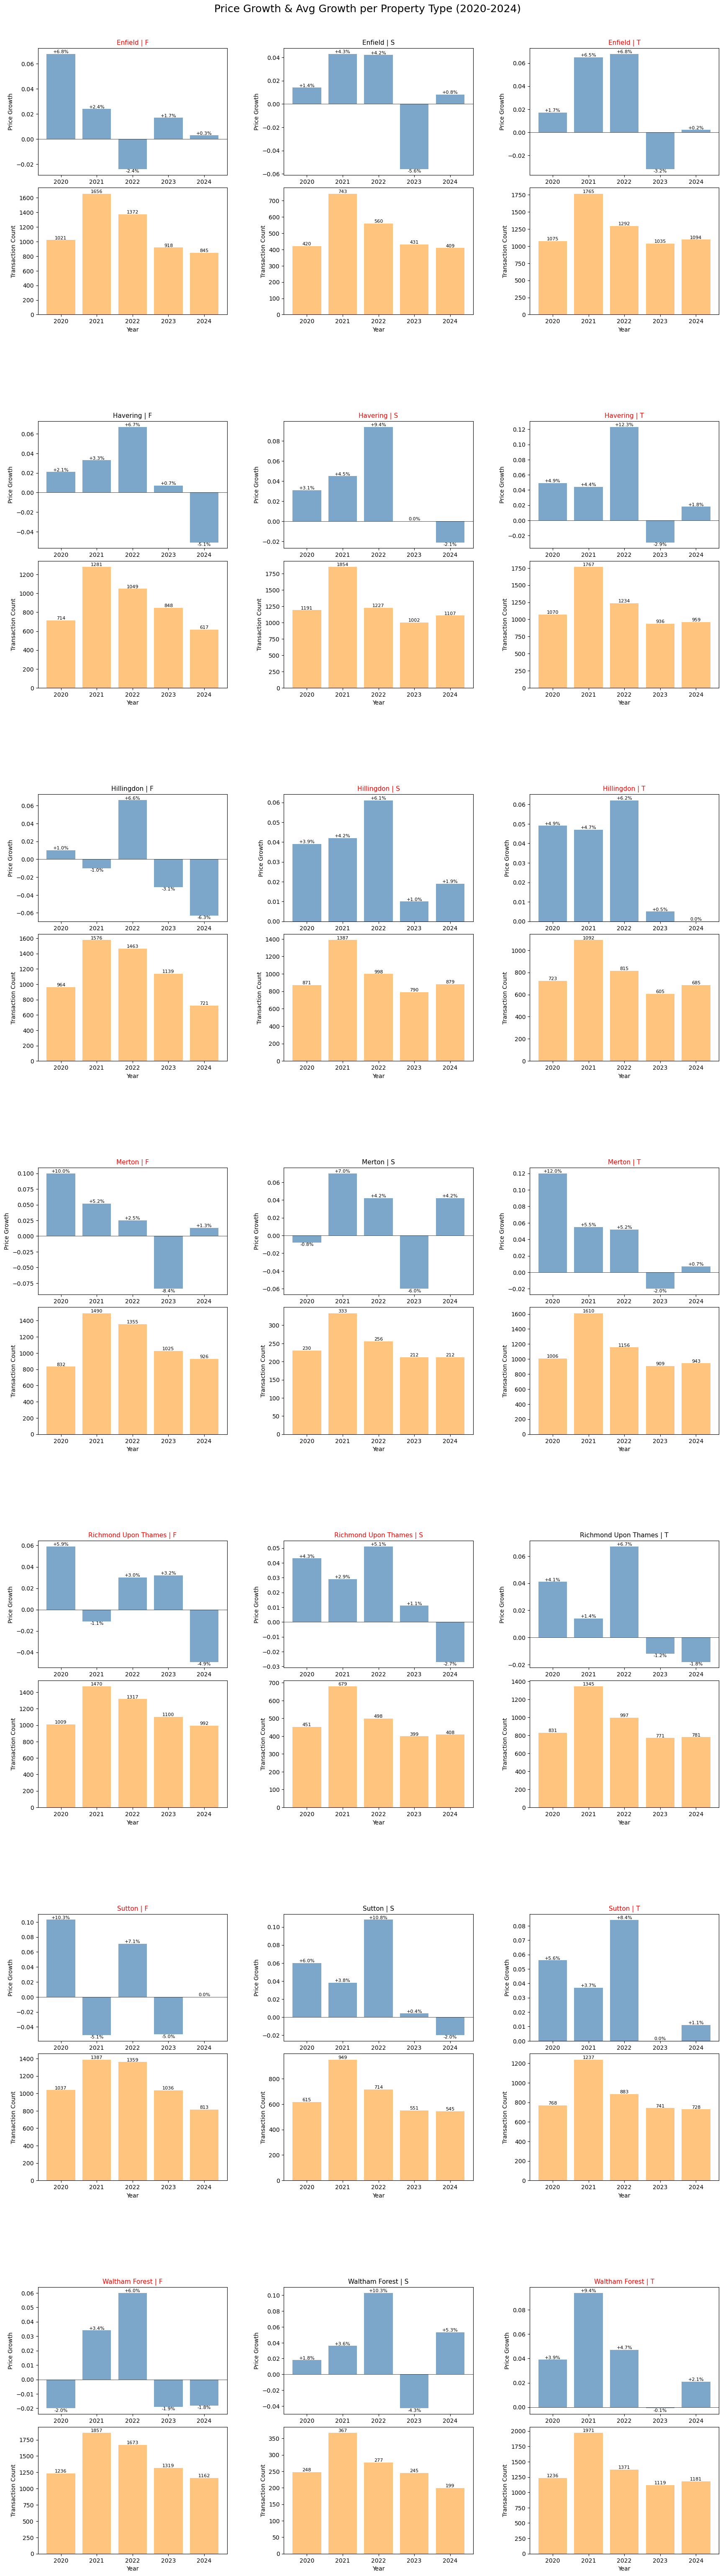

In [124]:
# Set up grid layout: 3 plots per row
cols = 3
boroughs = sorted(merged_type_bar['b&p'].unique())
n_boroughs = len(boroughs)
rows = math.ceil(n_boroughs / cols)

# Create main figure and grid layout for subplots
fig = plt.figure(figsize=(cols * 7, rows * 10))
outer_grid = gridspec.GridSpec(rows, cols, wspace=0.3, hspace=0.4)
# Loop through each borough-property type pair
for i, borough in enumerate(boroughs):
    # Filter data for the current borough-property combination
    price_data = merged_type_bar[merged_type_bar['b&p'] == borough]
    years = price_data['Year']
    price_growth = price_data['price_growth']
    transaction_count = price_data['Transaction Count']

    # Create a two-row layout (upper: price growth, lower: transaction count)
    inner_grid = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer_grid[i], height_ratios=[1, 1], hspace=0.1)

    # Upper Plot: Price Growth
    ax1 = plt.Subplot(fig, inner_grid[0])
    fig.add_subplot(ax1)
    bars1 = ax1.bar(years, price_growth, color='steelblue', alpha=0.7)
    ax1.set_ylabel('Price Growth')
    # Highlight selected "best" property types in red    
    if borough in best_property_type_list:
        ax1.set_title(borough.title(), fontsize=11, color='red')
    else:
        ax1.set_title(borough.title(), fontsize=11)
    ax1.axhline(0, color='black', linewidth=0.5)
    ax1.set_xticks([2020, 2021, 2022, 2023, 2024])
    # Annotate bars with percentage values
    for bar in bars1:
        height = bar.get_height()
        sign = '+' if height > 0 else ''
        ax1.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{sign}{height * 100:.1f}%', ha='center', va='bottom' if height >= 0 else 'top', fontsize=8)

    # Lower Plot: Transaction Count
    ax2 = plt.Subplot(fig, inner_grid[1])
    fig.add_subplot(ax2)
    bars2 = ax2.bar(years, transaction_count, color='darkorange', alpha=0.5)
    ax2.set_ylabel('Transaction Count')
    ax2.set_xlabel('Year')
    ax2.axhline(0, color='black', linewidth=0.5)
    # Annotate bars with count values
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height}', ha='center', va='bottom', fontsize=8)

fig.suptitle('Price Growth & Avg Growth per Property Type (2020-2024)', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.965)
plt.savefig('C:/Users/kerry/Desktop/side_project_crime_propertyprice/london_property_and_crime_data/charts/question05/price_growth&transaction.png',dpi = 300)
plt.show()


In [113]:
# Insight
# This analysis confirms that flats and terraced houses are the dominant property types in most boroughs, offering a combination of high transaction volume and stable or positive price growth. 
# These housing types demonstrate strong market acceptance and future potential.
# In Enfield, the results aligned with expectations: during the price correction period of 2023, flats and terraced homes showed resilience, maintaining relatively stable prices and strong transaction volumes. 
# These two types clearly represent the core product segments for promotion in the area.
# Similarly, in Havering and Hillingdon, semi-detached and terraced houses displayed notable resistance to price declines after 2023 and maintained healthy transaction activity. 
# Notably, flat prices fell sharply in the latter half of 2023, accompanied by a decline in volume—consistent with earlier assumptions that these areas are undergoing gentrification. 
# This trend supports the idea that focusing on semi-detached and terraced homes is a more strategic approach in these boroughs.
# Sutton presents a slightly more nuanced picture. 
# While all three major housing types show relatively similar transaction shares, flats and terraced houses exhibited stronger price resilience, suggesting a middle-class influx rather than the dominance of affluent buyers typically associated with early-stage gentrification.
# Interestingly, earlier hypotheses pointed to Merton, Richmond upon Thames, and Waltham Forest as boroughs possibly experiencing downward filtering. 
# However, during the 2023 price correction, flats and terraced homes in Merton and Richmond upon Thames did not show strong resilience, while semi-detached houses rebounded more significantly. 
# This may indicate that the former two housing types had been overpriced during the pandemic boom, or are now facing reduced demand due to affordability concerns.
# Of particular note is Richmond upon Thames, where all three major housing types experienced price declines in 2024. 
# This suggests potential external pressures or policy-related factors affecting the local market. 
# That said, flats and semi-detached houses performed relatively well during the 2023 correction, and may still warrant strategic attention moving forward.